In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
wine = pd.read_csv('./winequality-red.csv')
df = wine.copy()

In [5]:
df1=df.drop_duplicates()

In [20]:
import pandas as pd

# 이상치 확인 함수
def detect_outliers(df1):
    q1 = df1.quantile(0.25)
    q3 = df1.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df1 < lower_bound) | (df1 > upper_bound)
    return outliers

# 이상치 개수와 범위 출력을 위한 데이터프레임 생성
outliers_df1 = pd.DataFrame(index=df1.columns, columns=['Outlier Count', 'Outlier Range'])

# 각 변수에 대해 이상치 개수와 범위 계산
for column in df1.columns:
    outliers = detect_outliers(df1[column])
    outlier_count = outliers.sum()
    outlier_range = f"{df1[column][outliers].min()} - {df1[column][outliers].max()}"
    
    # 결과 저장
    outliers_df1.loc[column] = [outlier_count, outlier_range]

# 결과 출력
print("Outlier Information:")
outliers_df1

Outlier Information:


,Outlier Count,Outlier Range
fixed acidity,41,12.4 - 15.9
volatile acidity,19,1.02 - 1.58
citric acid,1,1.0 - 1.0
residual sugar,126,3.7 - 15.5
chlorides,87,0.012 - 0.611
free sulfur dioxide,26,43.0 - 72.0
total sulfur dioxide,45,125.0 - 289.0
density,35,0.99007 - 1.00369
pH,28,2.74 - 4.01
sulphates,55,1.0 - 2.0


In [54]:
# 모든 열에 대한 반복문
for column_name in df1.columns:
    print("=" * 50)
    print(f"Outliers in column '{column_name}':")
    
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 추출
    outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)][column_name]
    
    # 이상치를 크기순으로 정렬
    sorted_outliers = outliers.sort_values()
    
    # 이상치 출력
    for i, (index, value) in enumerate(sorted_outliers.items(), start=1):
        print(f"{i}. Index: {index}, Value: {value}")
    
    # 이상치 개수 출력
    outlier_count = sorted_outliers.count()
    print(f"Number of outliers: {outlier_count}")


Outliers in column 'fixed acidity':
1. Index: 596, Value: 12.4
2. Index: 338, Value: 12.4
3. Index: 548, Value: 12.4
4. Index: 510, Value: 12.4
5. Index: 516, Value: 12.5
6. Index: 409, Value: 12.5
7. Index: 264, Value: 12.5
8. Index: 339, Value: 12.5
9. Index: 446, Value: 12.5
10. Index: 472, Value: 12.5
11. Index: 363, Value: 12.5
12. Index: 814, Value: 12.6
13. Index: 1224, Value: 12.6
14. Index: 359, Value: 12.6
15. Index: 440, Value: 12.6
16. Index: 560, Value: 12.7
17. Index: 394, Value: 12.7
18. Index: 599, Value: 12.7
19. Index: 205, Value: 12.8
20. Index: 429, Value: 12.8
21. Index: 364, Value: 12.8
22. Index: 811, Value: 12.9
23. Index: 538, Value: 12.9
24. Index: 559, Value: 13.0
25. Index: 470, Value: 13.0
26. Index: 601, Value: 13.2
27. Index: 611, Value: 13.2
28. Index: 509, Value: 13.3
29. Index: 294, Value: 13.3
30. Index: 680, Value: 13.3
31. Index: 328, Value: 13.4
32. Index: 353, Value: 13.5
33. Index: 381, Value: 13.7
34. Index: 347, Value: 13.8
35. Index: 374, Valu

Outliers in column 'fixed acidity':
Number of outliers: 41


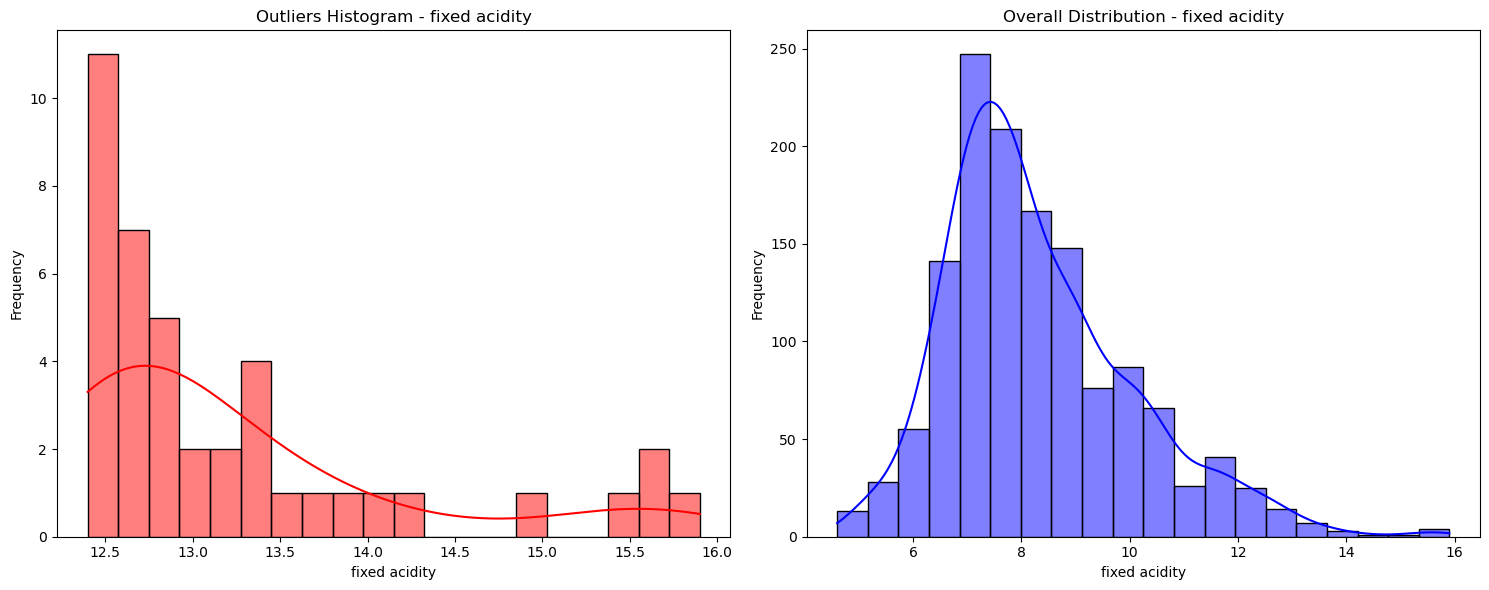

Outliers in column 'volatile acidity':
Number of outliers: 19


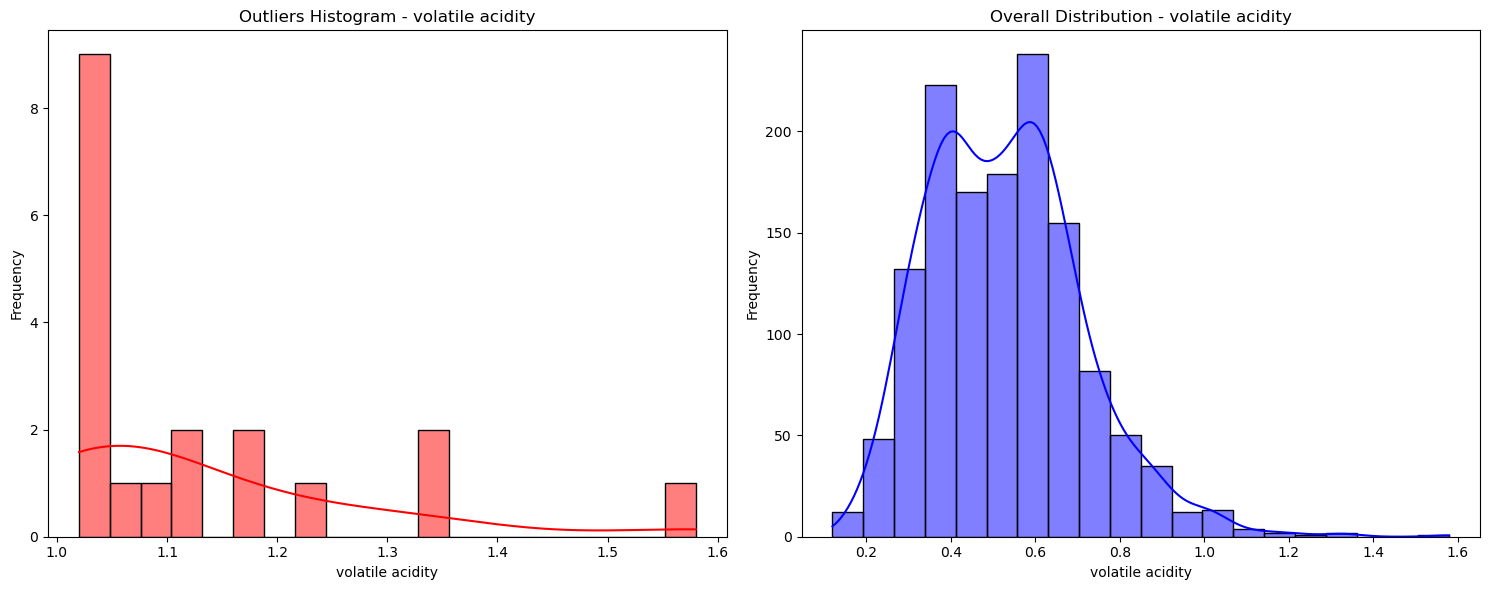

Outliers in column 'citric acid':
Number of outliers: 1


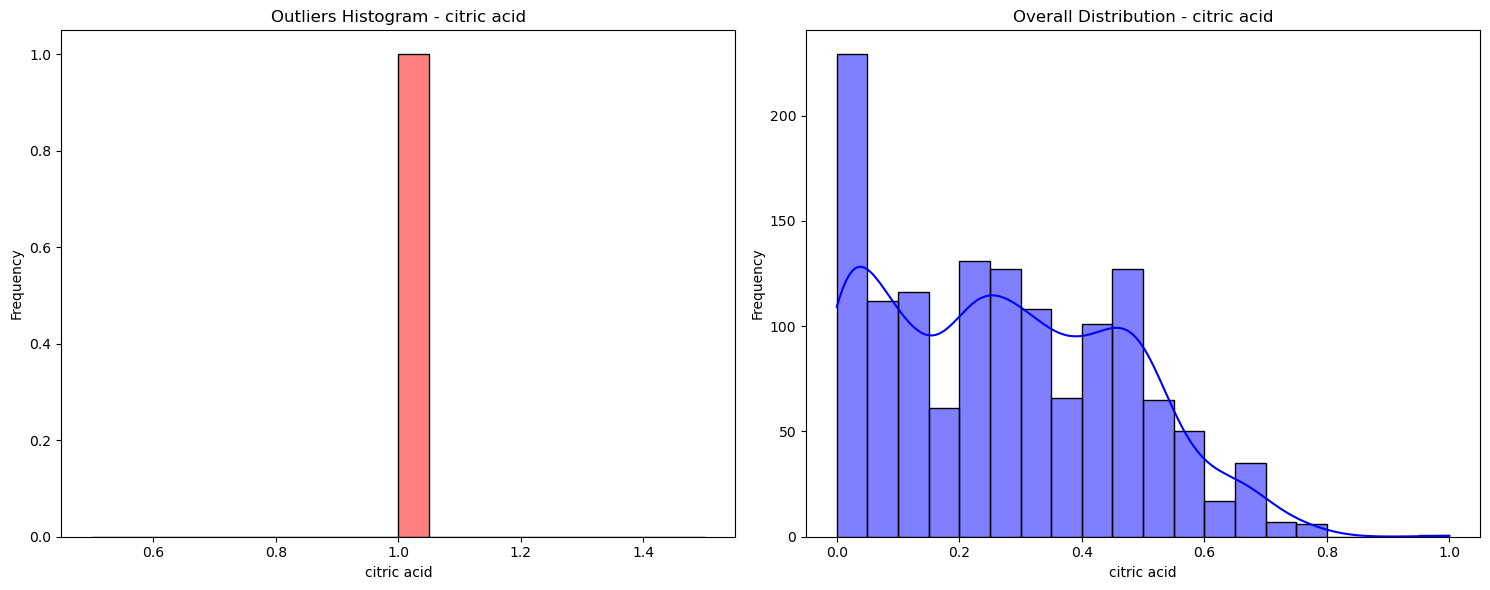

Outliers in column 'residual sugar':
Number of outliers: 126


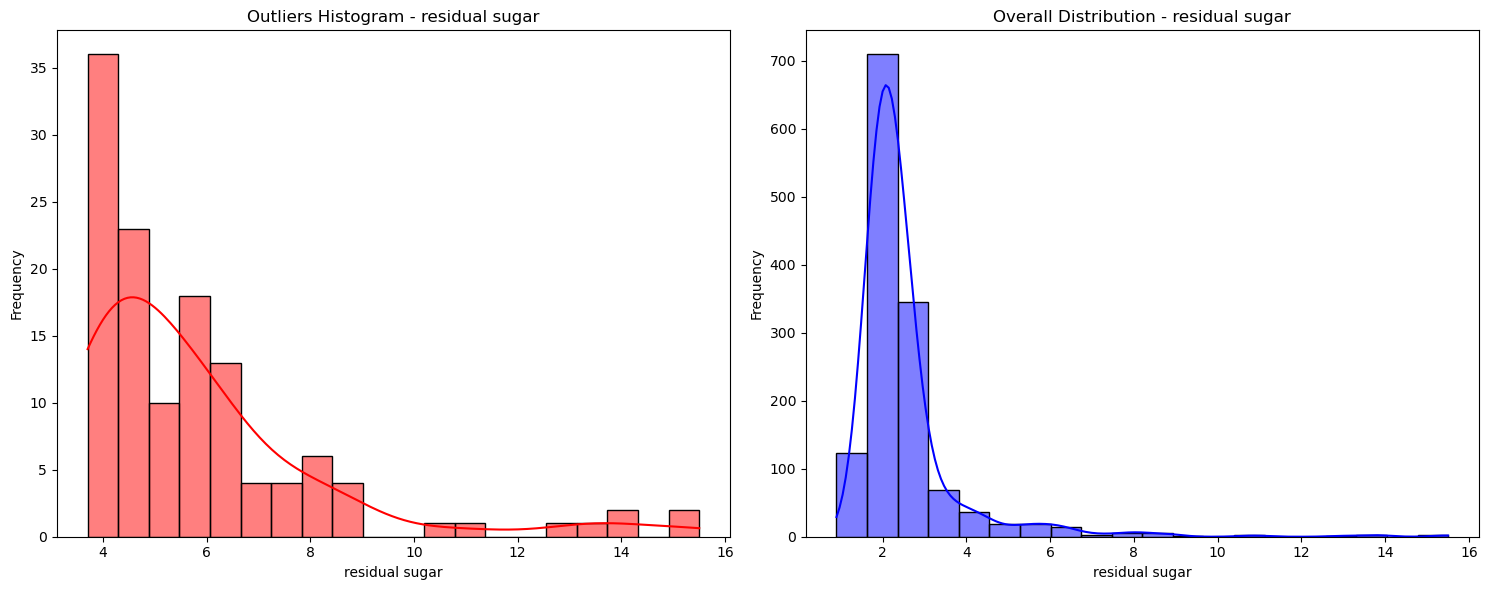

Outliers in column 'chlorides':
Number of outliers: 87


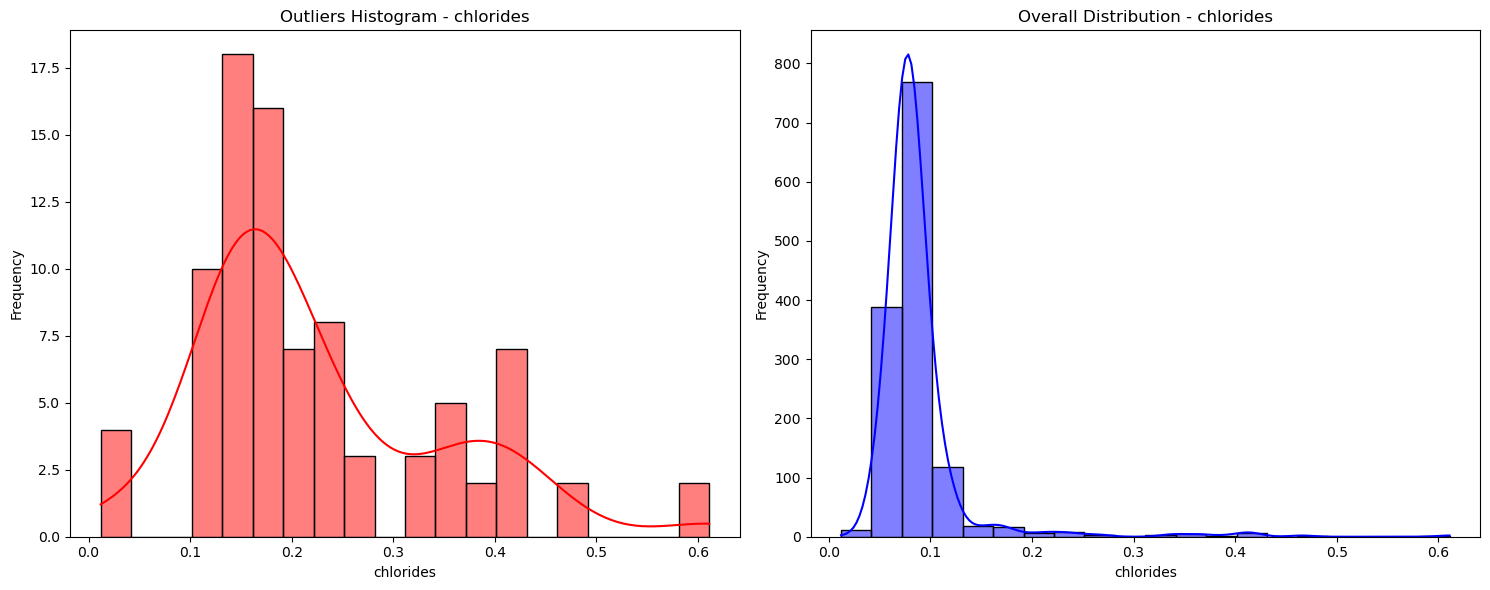

Outliers in column 'free sulfur dioxide':
Number of outliers: 26


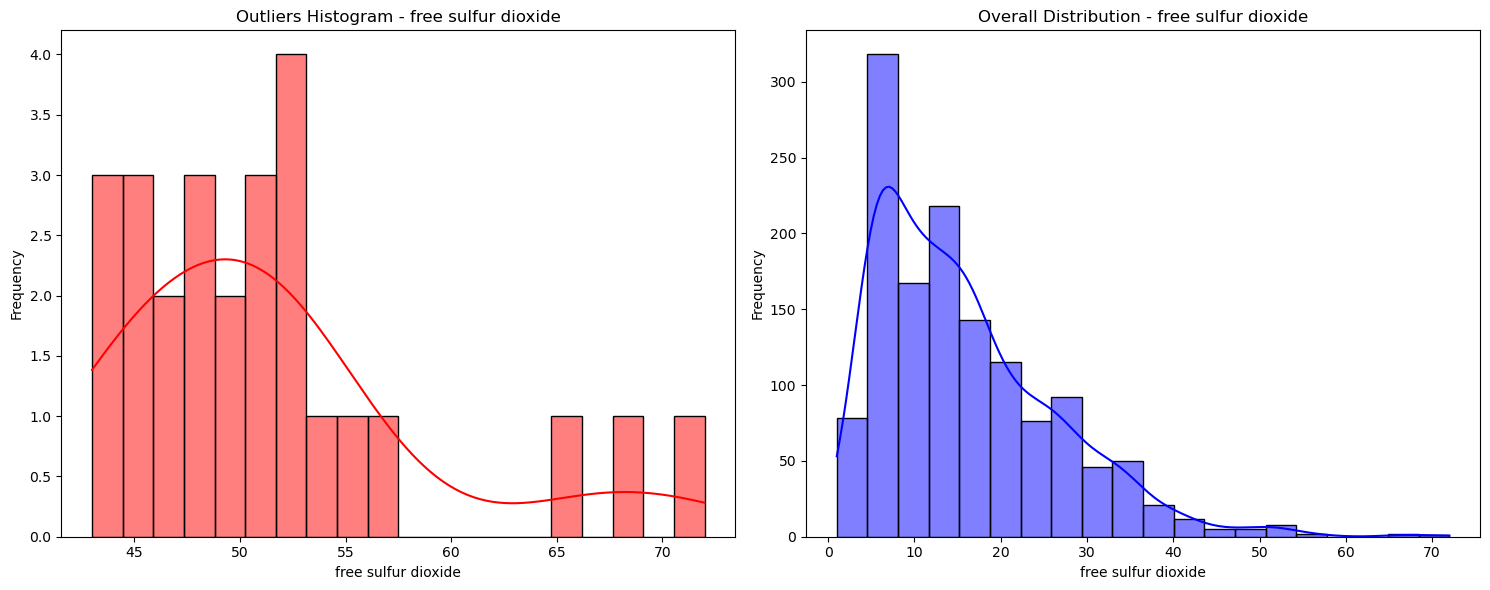

Outliers in column 'total sulfur dioxide':
Number of outliers: 45


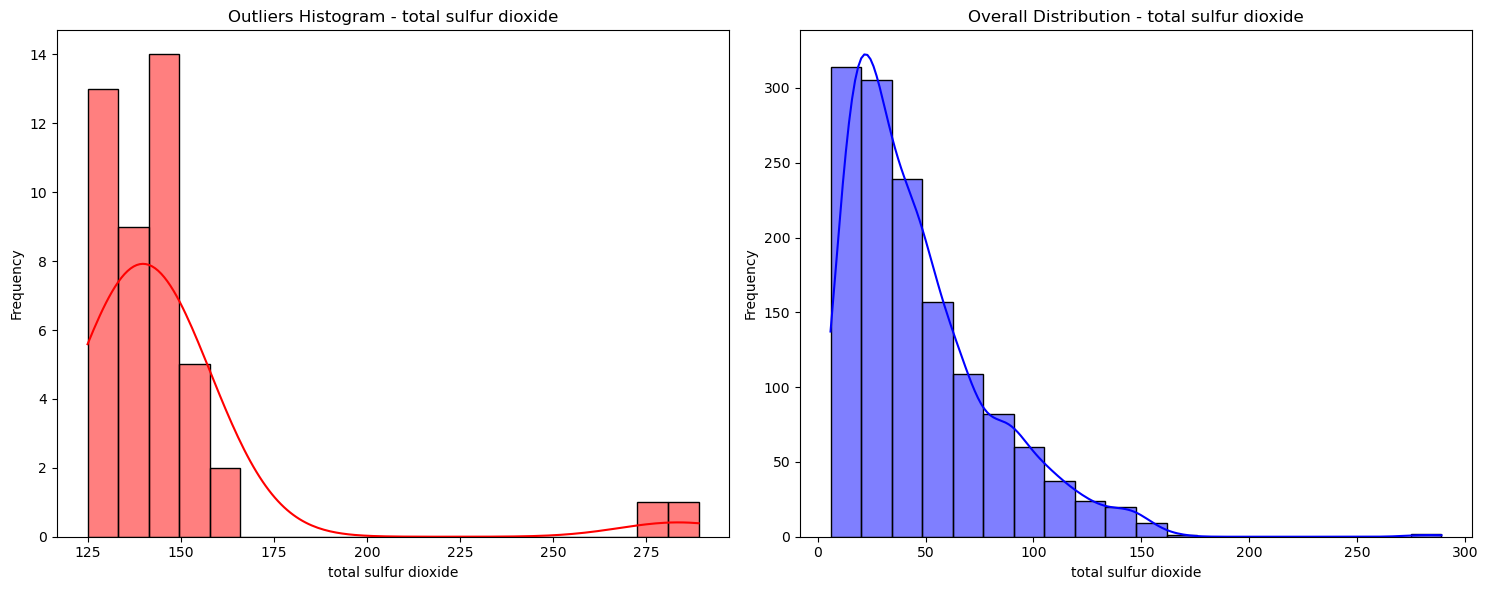

Outliers in column 'density':
Number of outliers: 35


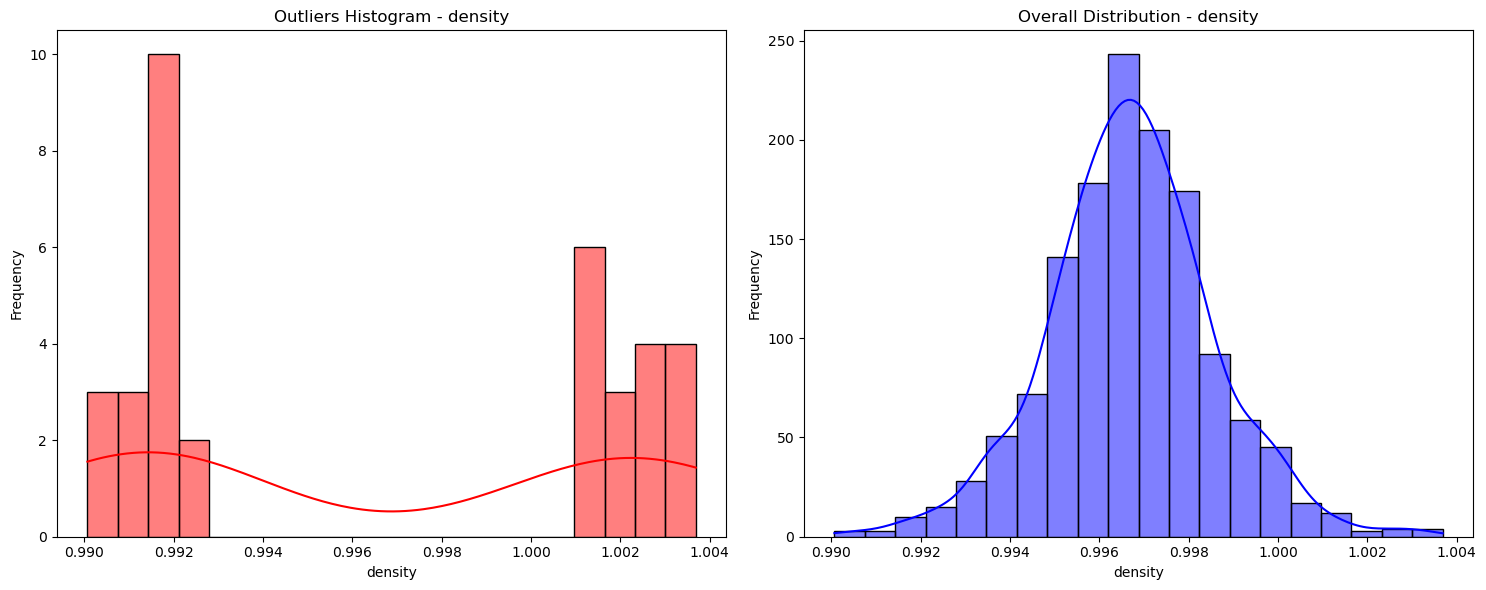

Outliers in column 'pH':
Number of outliers: 28


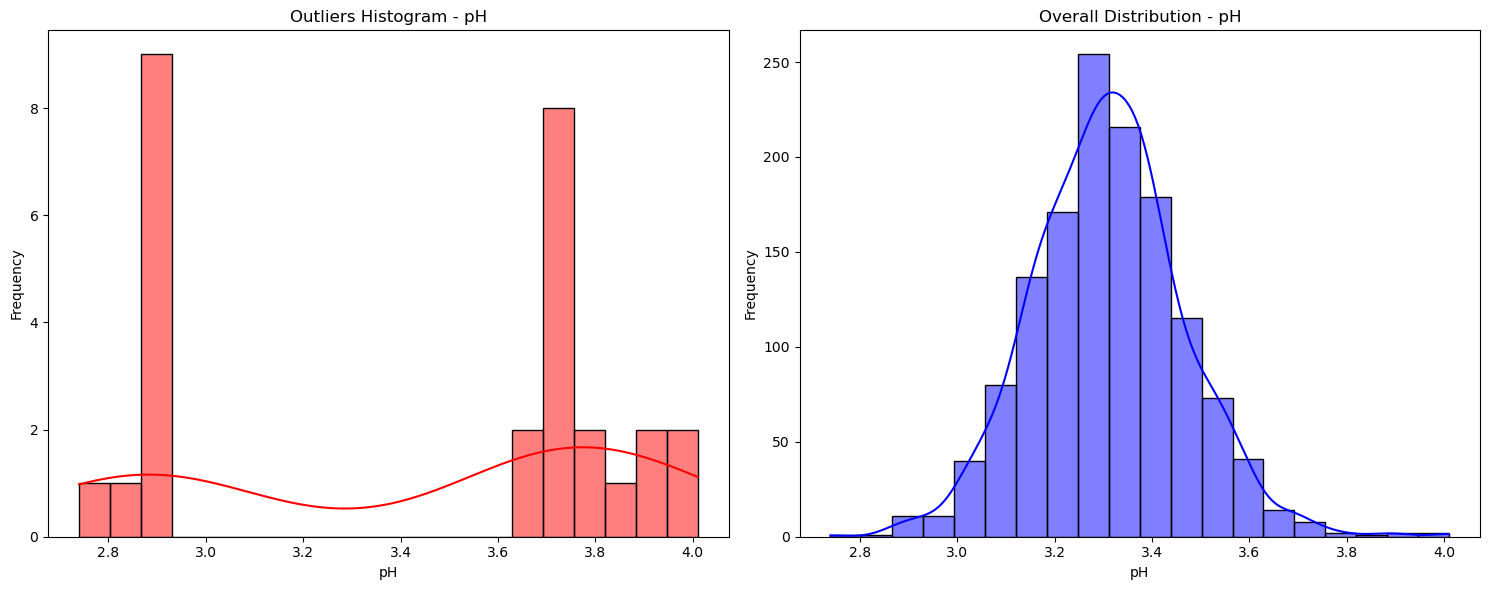

Outliers in column 'sulphates':
Number of outliers: 55


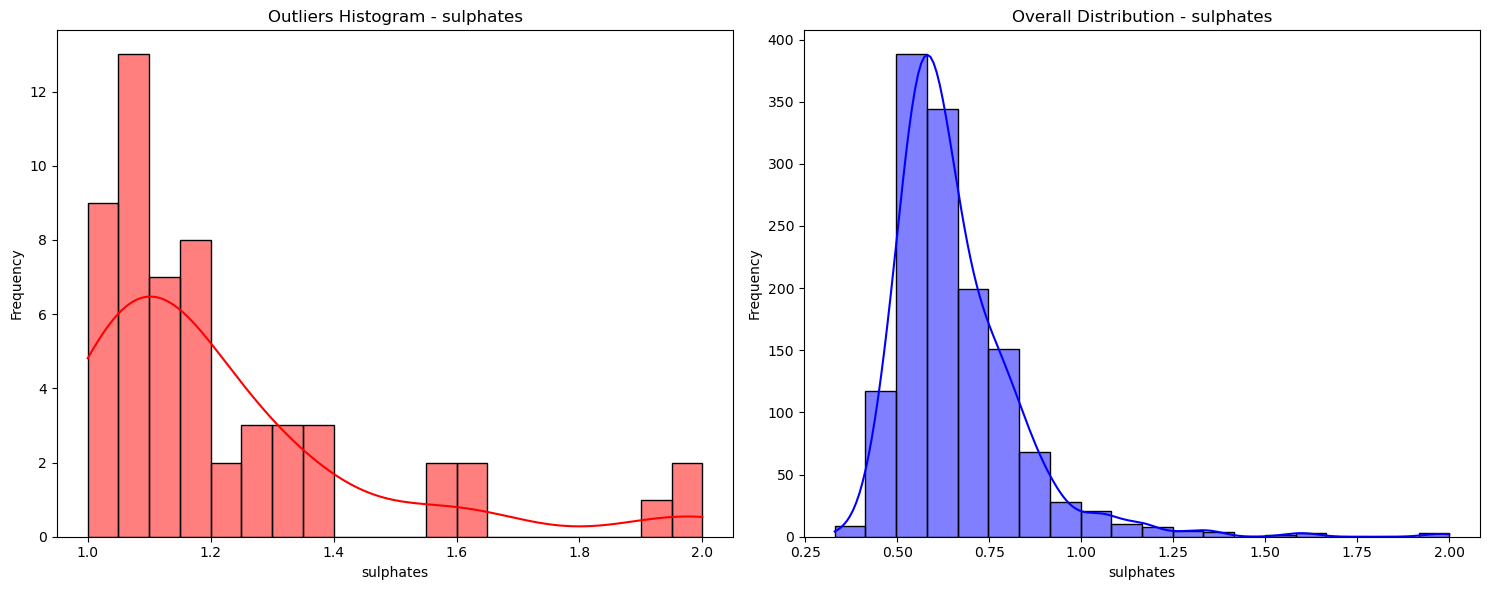

Outliers in column 'alcohol':
Number of outliers: 12


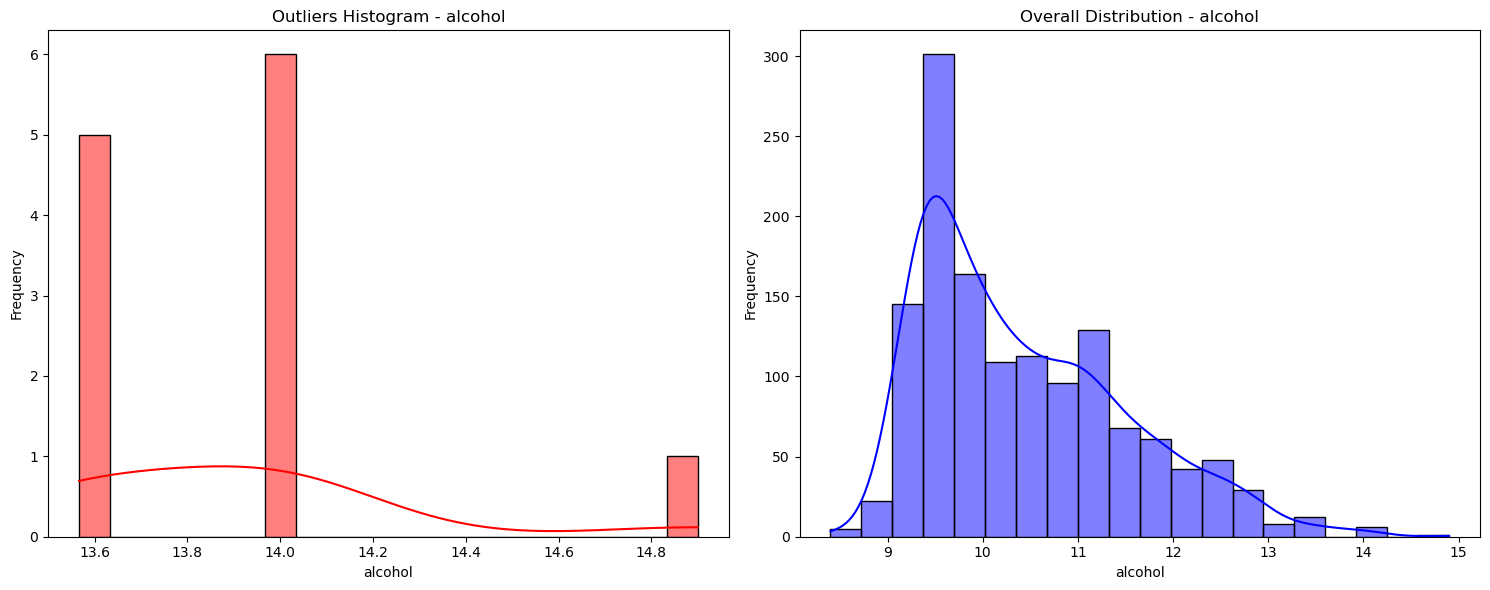

Outliers in column 'quality':
Number of outliers: 27


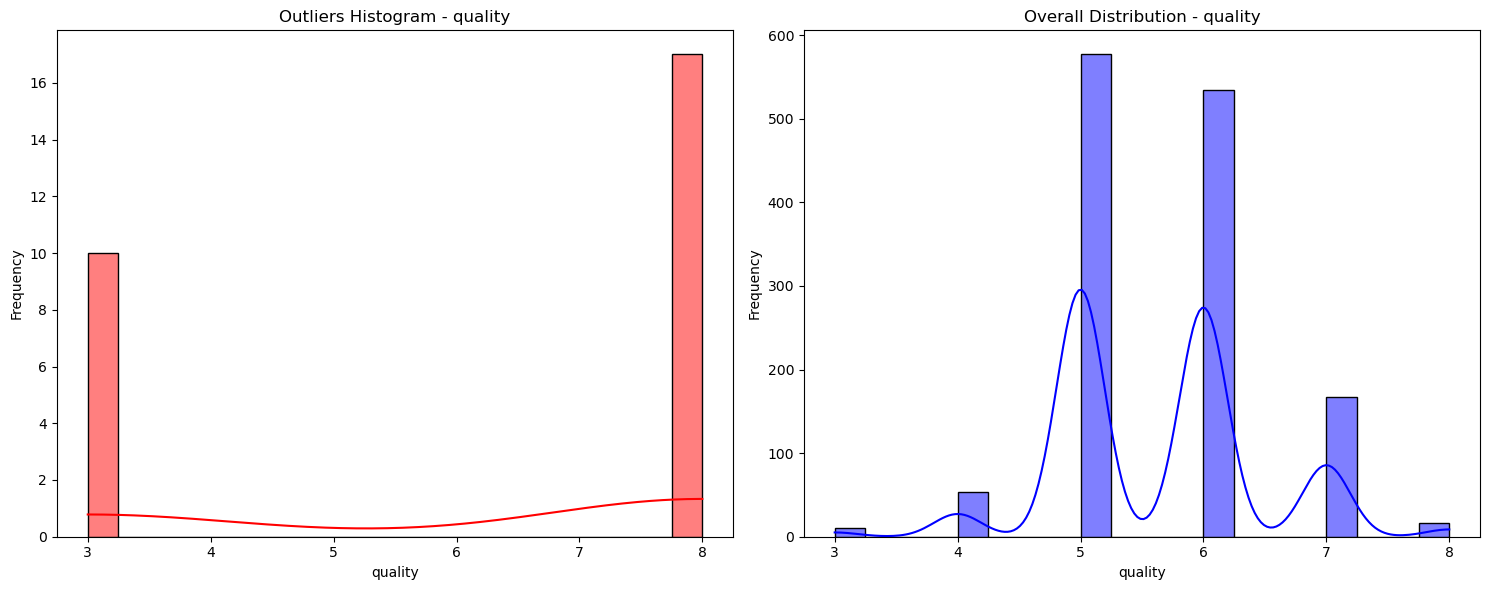

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모든 열에 대한 반복문
for column_name in df1.columns:
    print("=" * 50)
    print(f"Outliers in column '{column_name}':")
    
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 추출
    outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)][column_name]
    
    # 이상치를 크기순으로 정렬
    sorted_outliers = outliers.sort_values()
    
    # 이상치 개수 출력
    outlier_count = sorted_outliers.count()
    print(f"Number of outliers: {outlier_count}")
    
    # 이상치 히스토그램 그리기
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)  # 그리드 1행 2열 중 첫 번째 subplot
    sns.histplot(sorted_outliers, bins=20, kde=True, color='red')
    plt.title(f"Outliers Histogram - {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    
    # 전체 데이터 분포 히스토그램 그리기
    plt.subplot(1, 2, 2)  # 그리드 1행 2열 중 두 번째 subplot
    sns.histplot(df1[column_name], bins=20, kde=True, color='blue')
    plt.title(f"Overall Distribution - {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()



Cumulative Distribution of Outliers in column 'fixed acidity':


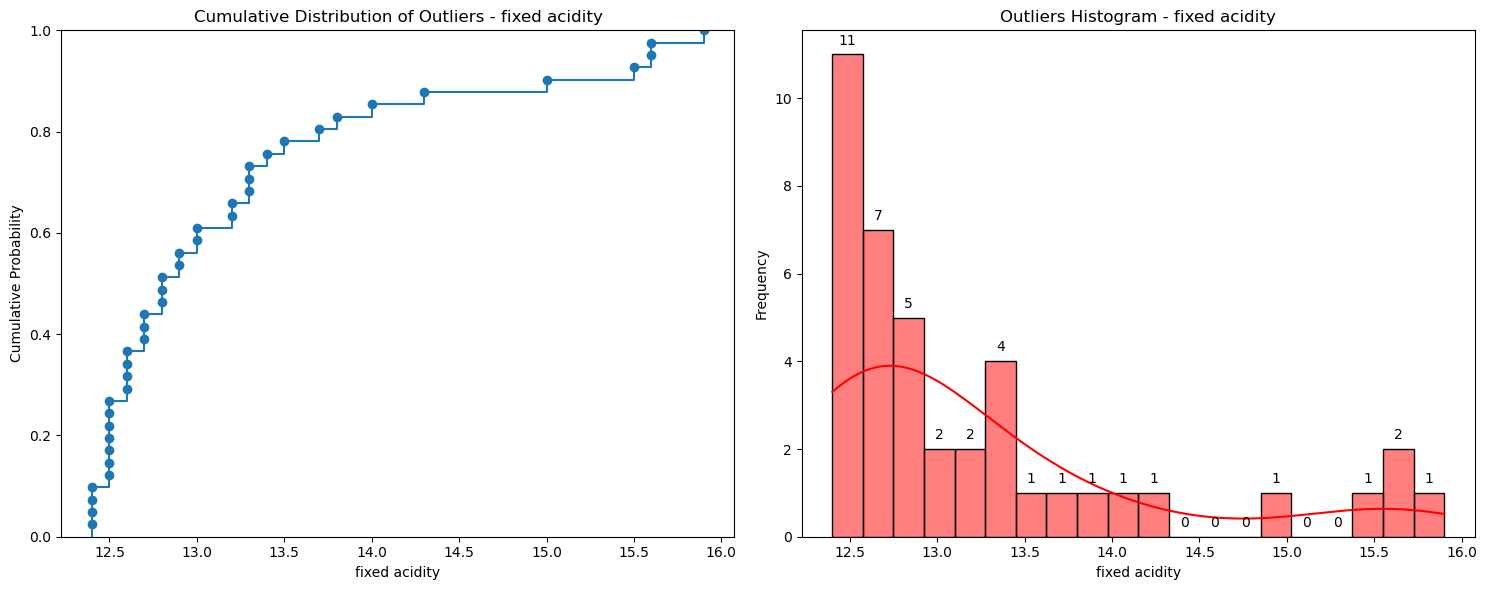

Cumulative Distribution of Outliers in column 'volatile acidity':


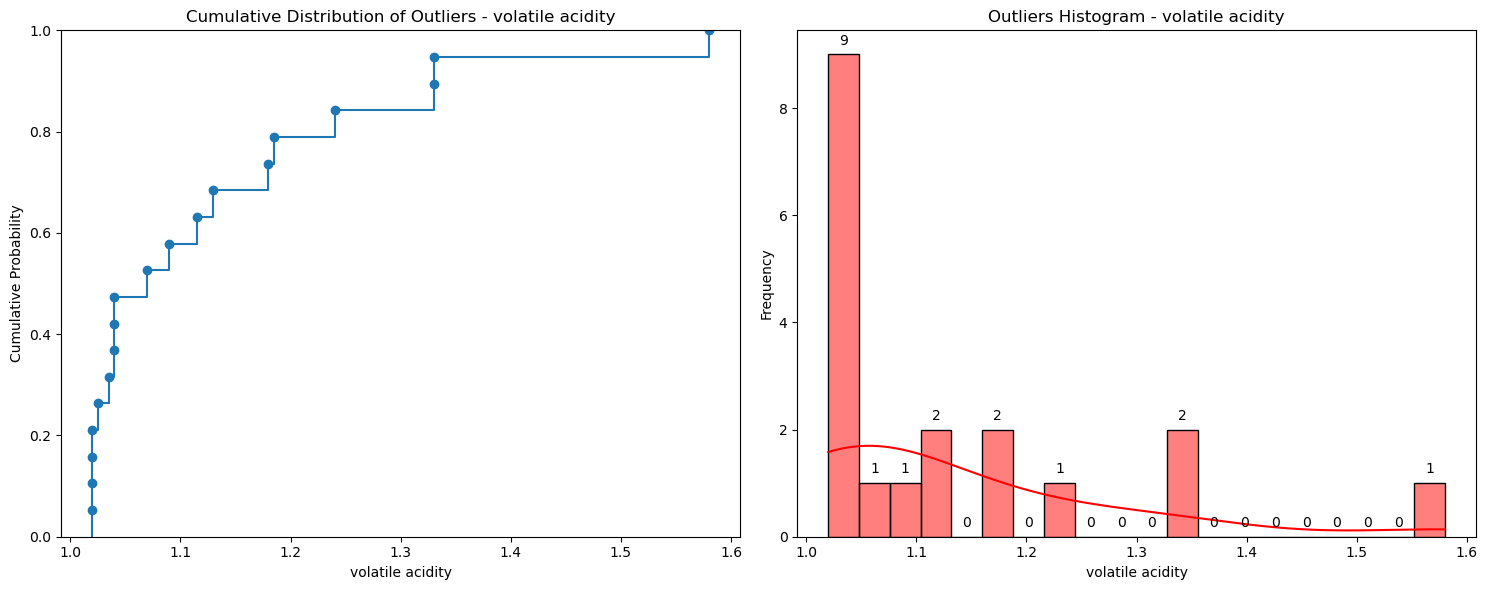

Cumulative Distribution of Outliers in column 'citric acid':


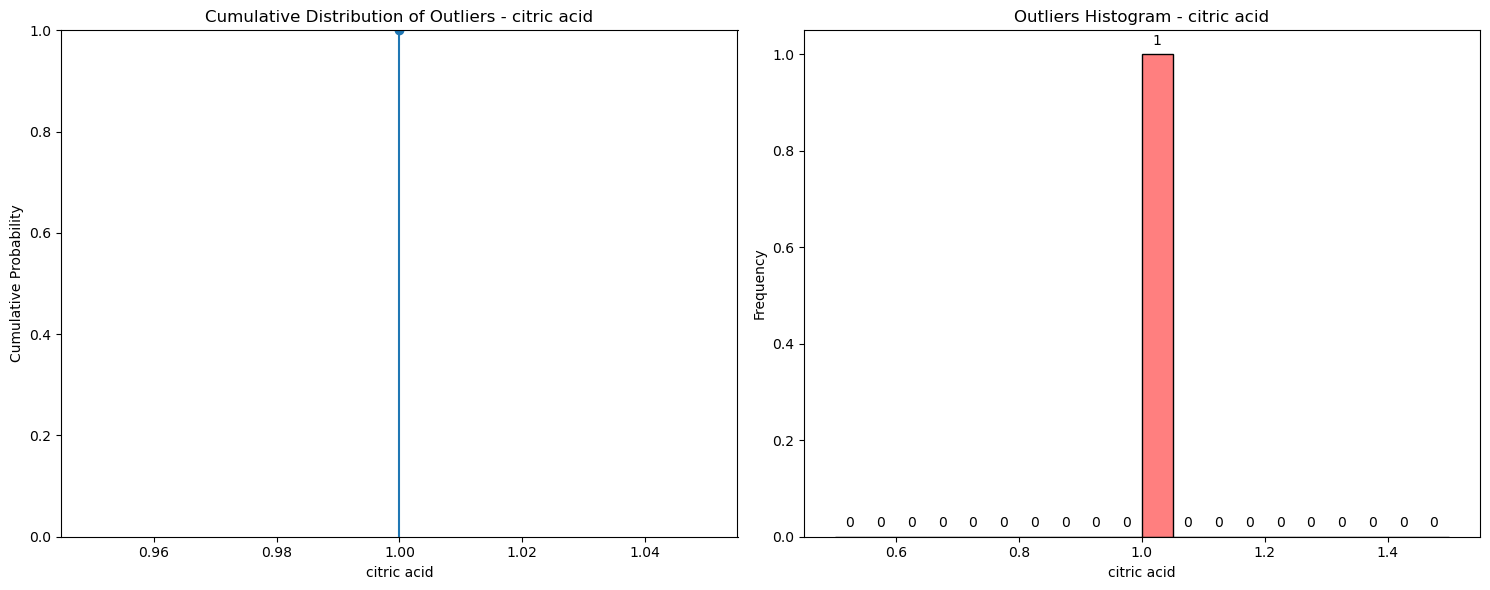

Cumulative Distribution of Outliers in column 'residual sugar':


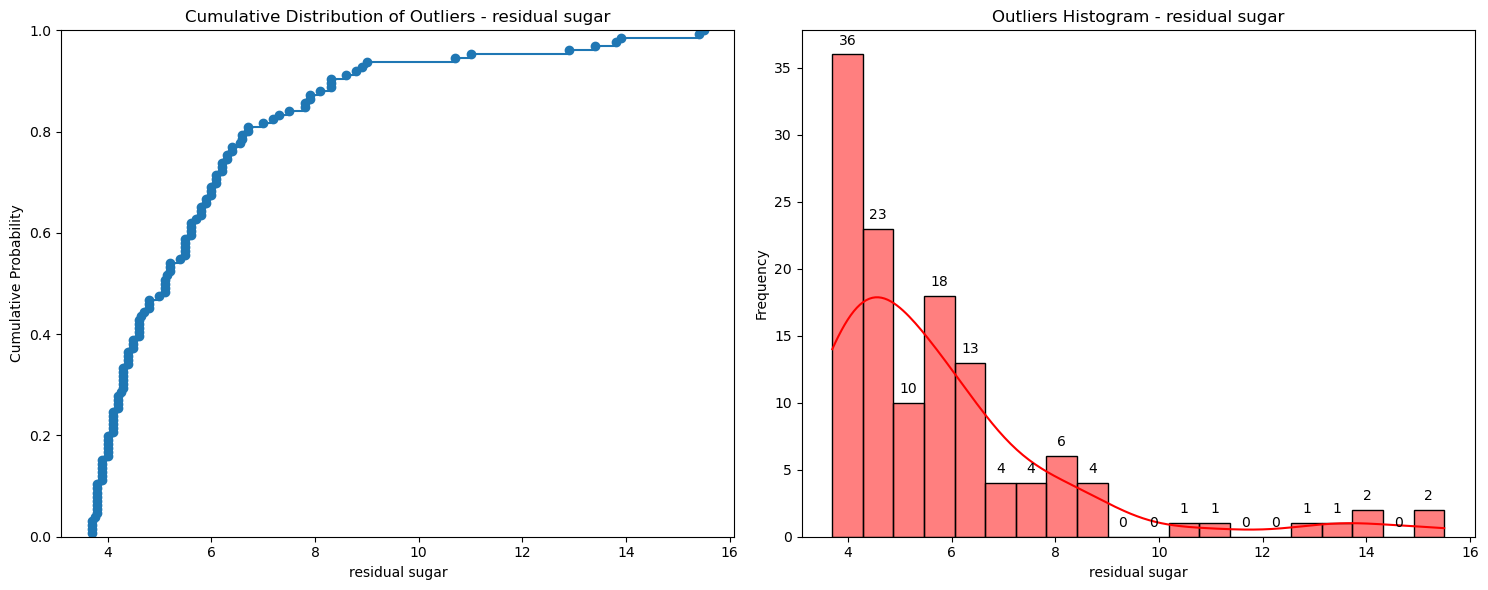

Cumulative Distribution of Outliers in column 'chlorides':


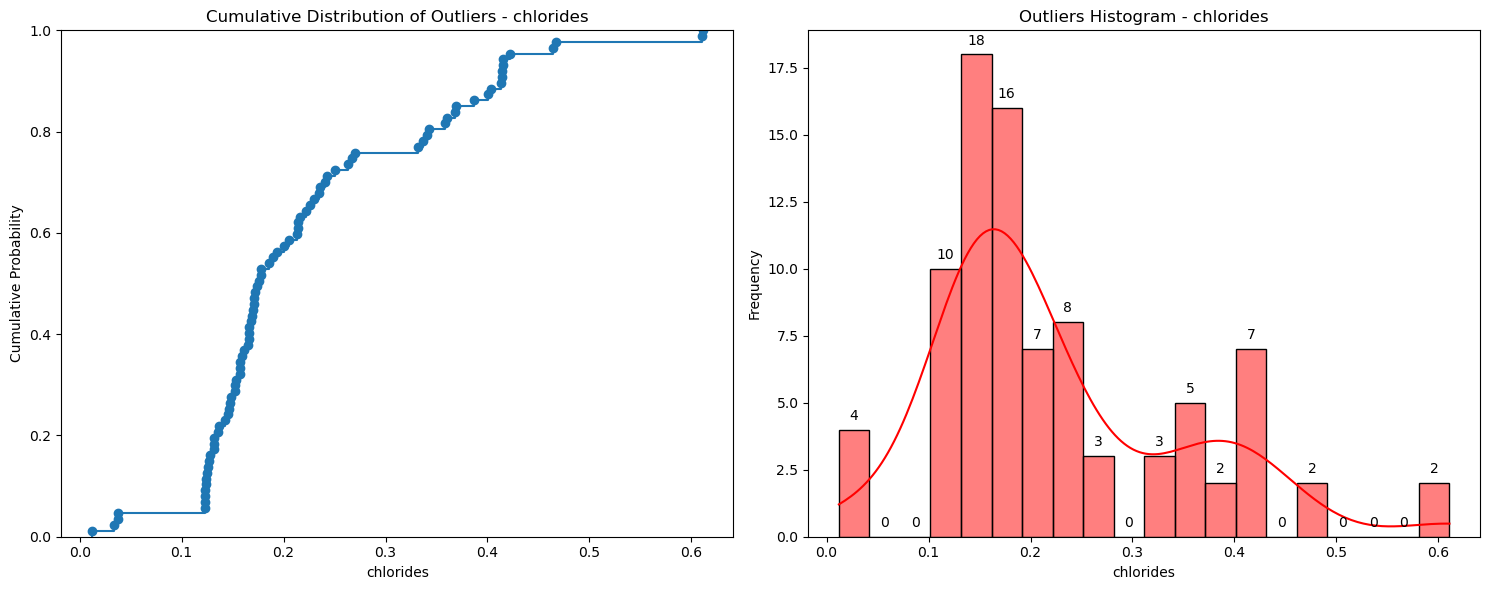

Cumulative Distribution of Outliers in column 'free sulfur dioxide':


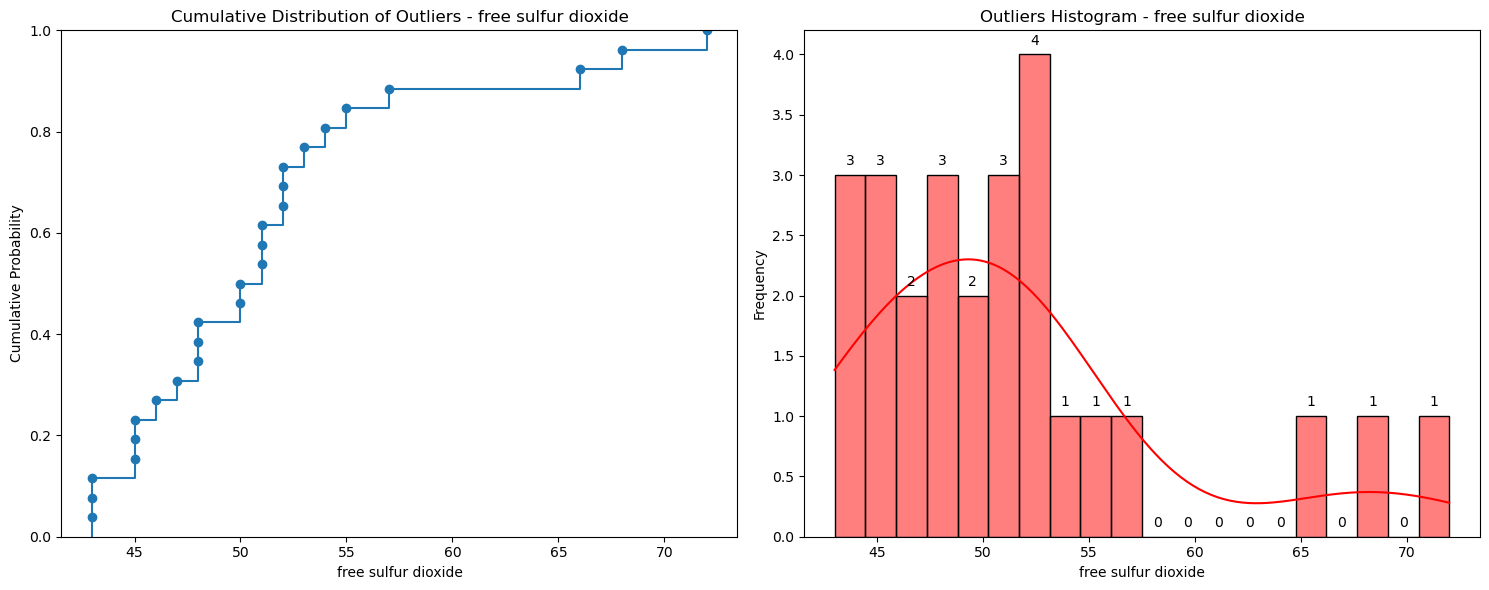

Cumulative Distribution of Outliers in column 'total sulfur dioxide':


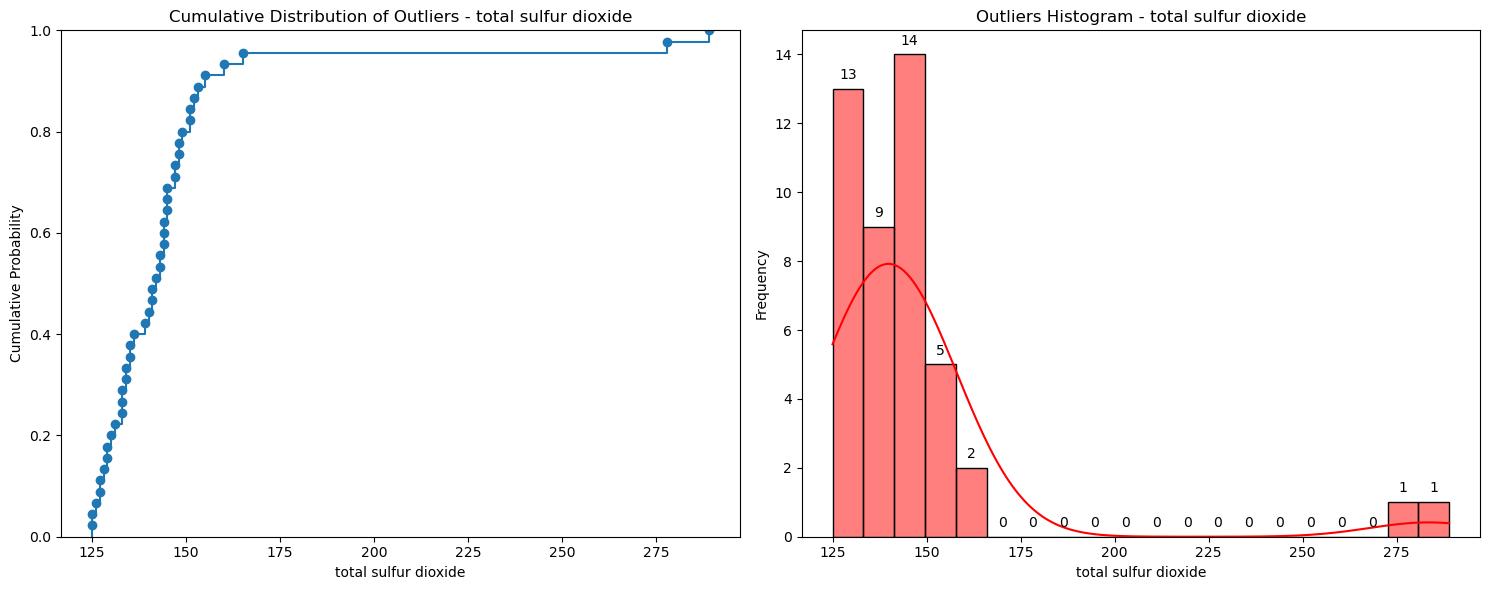

Cumulative Distribution of Outliers in column 'density':


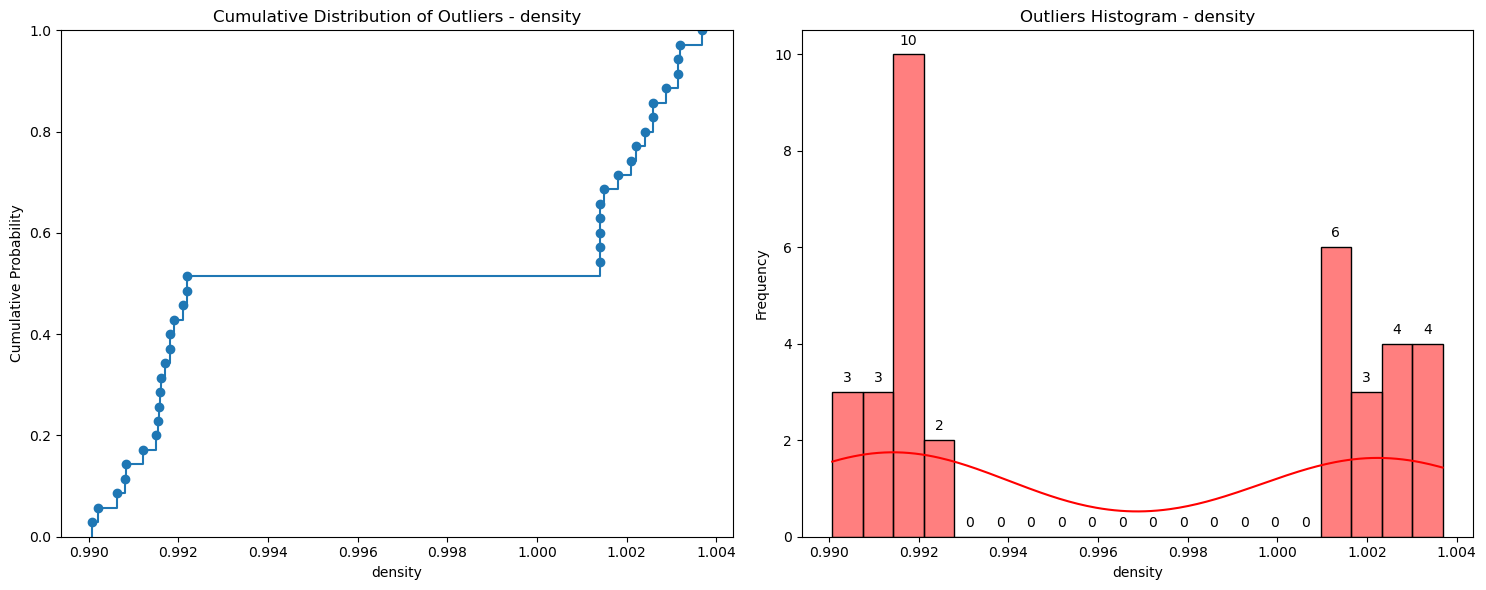

Cumulative Distribution of Outliers in column 'pH':


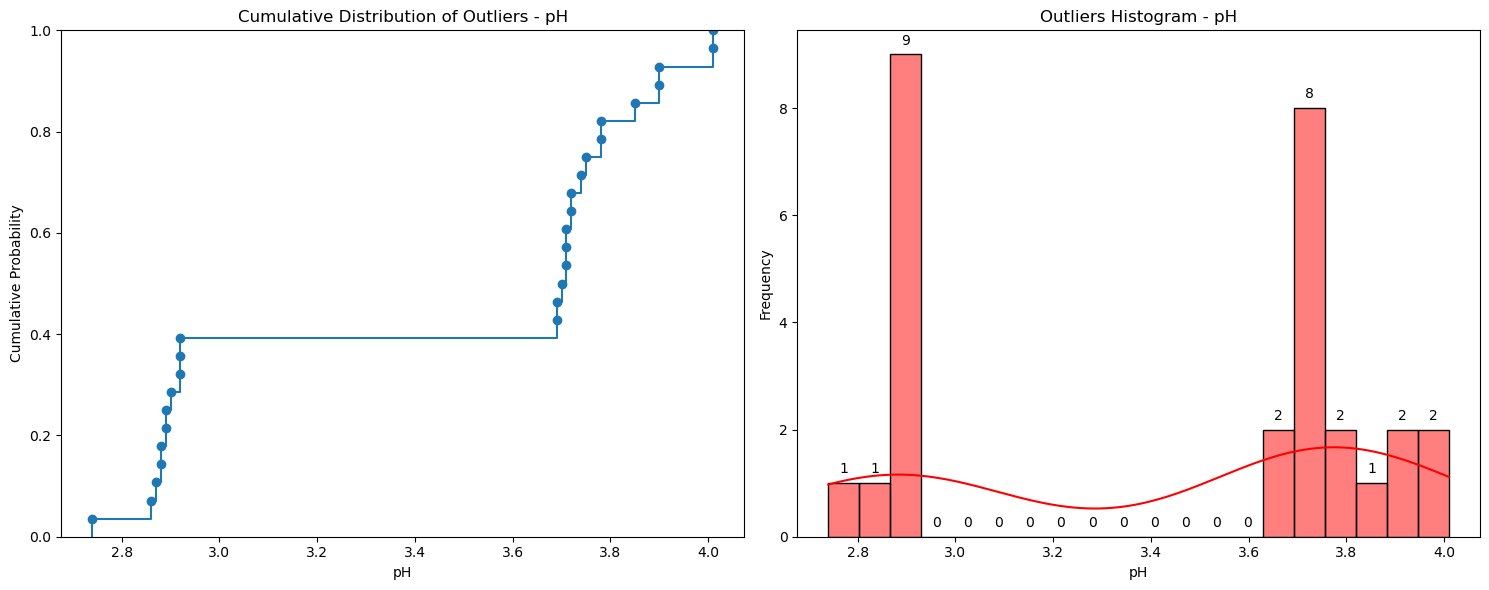

Cumulative Distribution of Outliers in column 'sulphates':


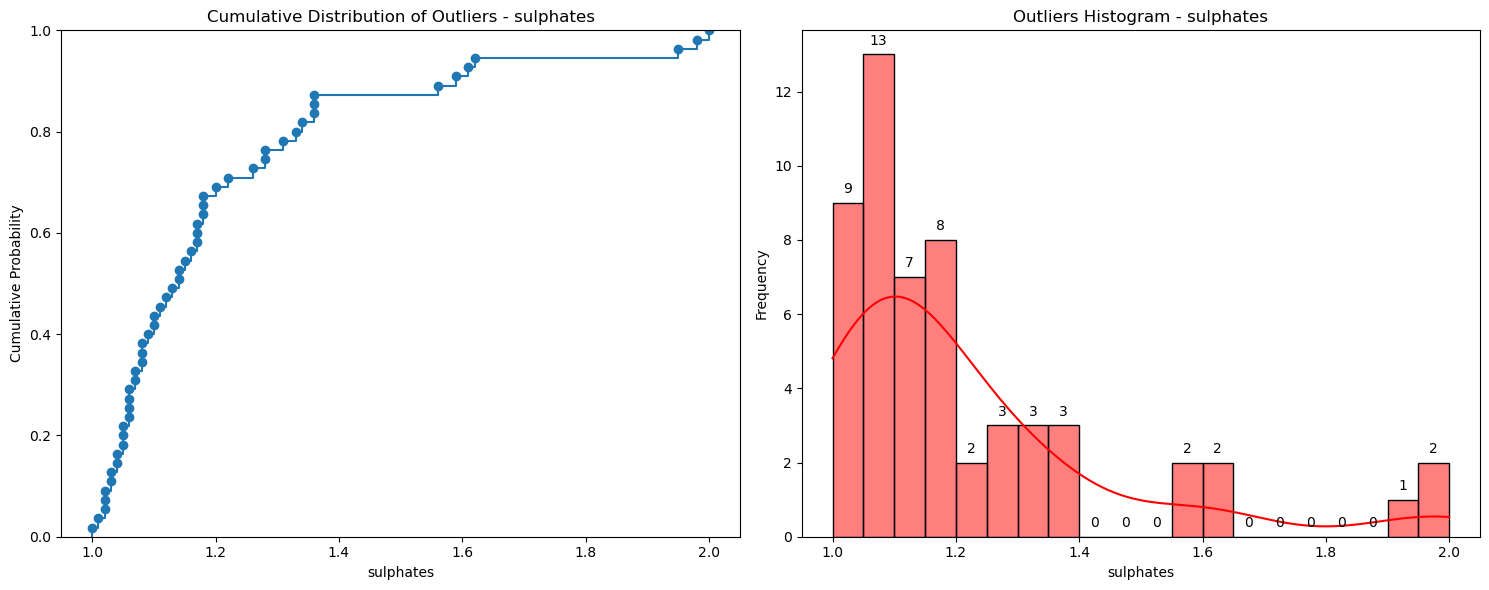

Cumulative Distribution of Outliers in column 'alcohol':


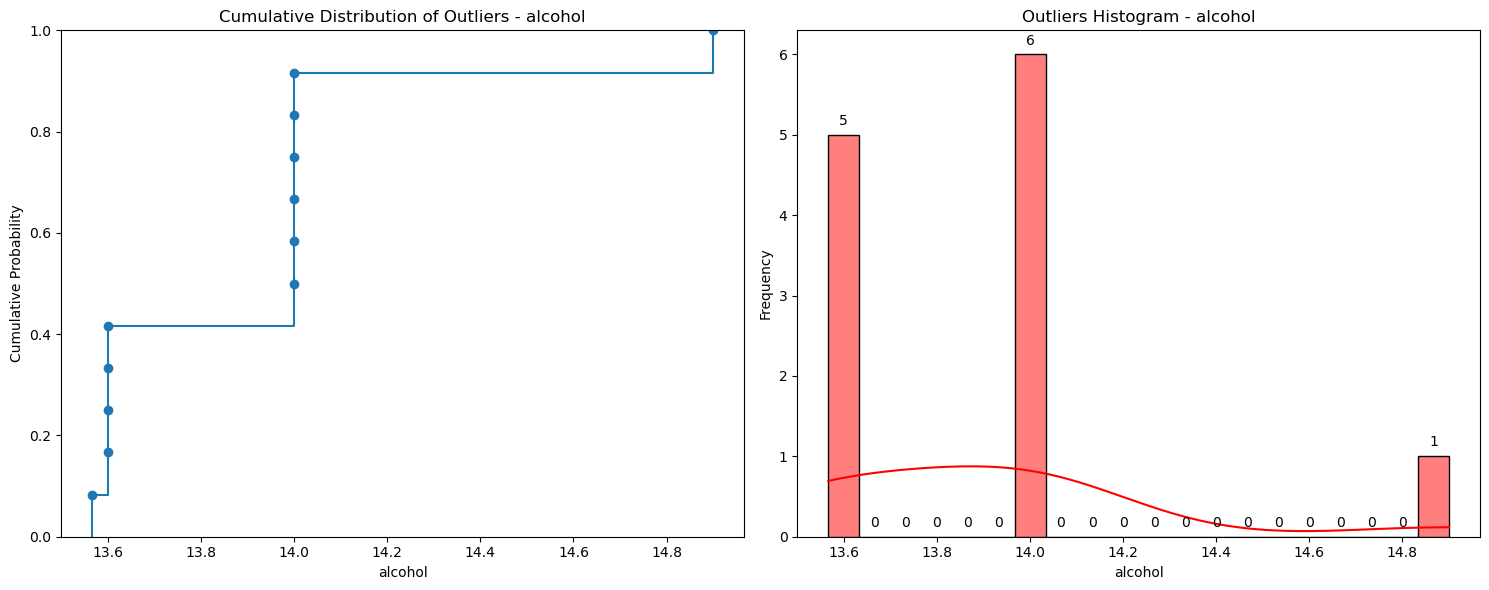

Cumulative Distribution of Outliers in column 'quality':


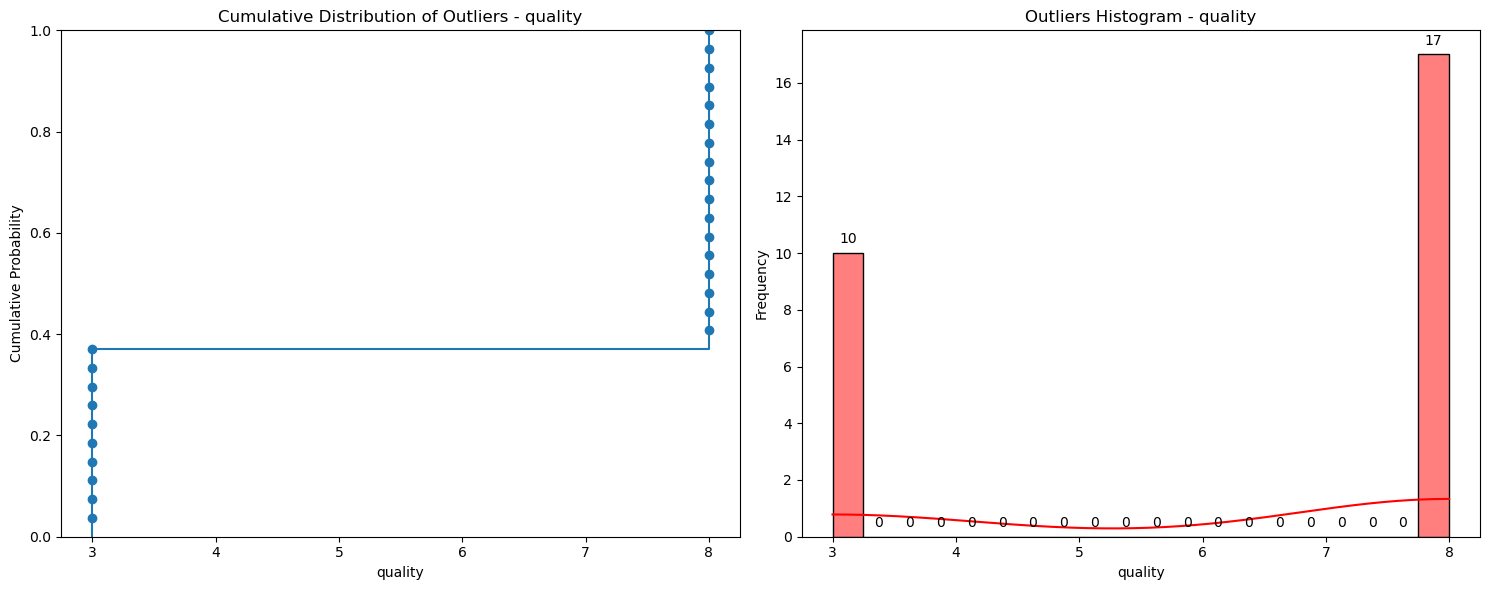

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 모든 열에 대한 반복문
for column_name in df1.columns:
    print("=" * 50)
    print(f"Cumulative Distribution of Outliers in column '{column_name}':")
    
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 추출
    outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)][column_name]
    
    # 이상치를 크기순으로 정렬
    sorted_outliers = outliers.sort_values()
    
    # 이상치 누적분포 함수 그리기
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)  # 그리드 1행 2열 중 첫 번째 subplot
    sns.ecdfplot(sorted_outliers, marker='o', linestyle='-')
    plt.title(f"Cumulative Distribution of Outliers - {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Cumulative Probability")
    
    plt.subplot(1, 2, 2)  # 그리드 1행 2열 중 두 번째 subplot
    ax = sns.histplot(sorted_outliers, bins=20, kde=True, color='red')
    plt.title(f"Outliers Histogram - {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    
    # 막대 위에 y축 값 표시
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()



# 5.1. Histplot

# 5.1.2. Histplot (3)

5.1.2. histplot(2)과 차이점
본 히스토그램은 새로 추가한 것으로 각 변수에 있는 데이터의 분포를 좀 더 분석하기 쉽도록, 히스토그램에 평균, 중앙값, 최빈값을 점선으로 표시할 수 있도록 하였다. 그리고 히스토그램의 우상단에는 표준편차, 첨도, 왜도의 값을 표시하였다.

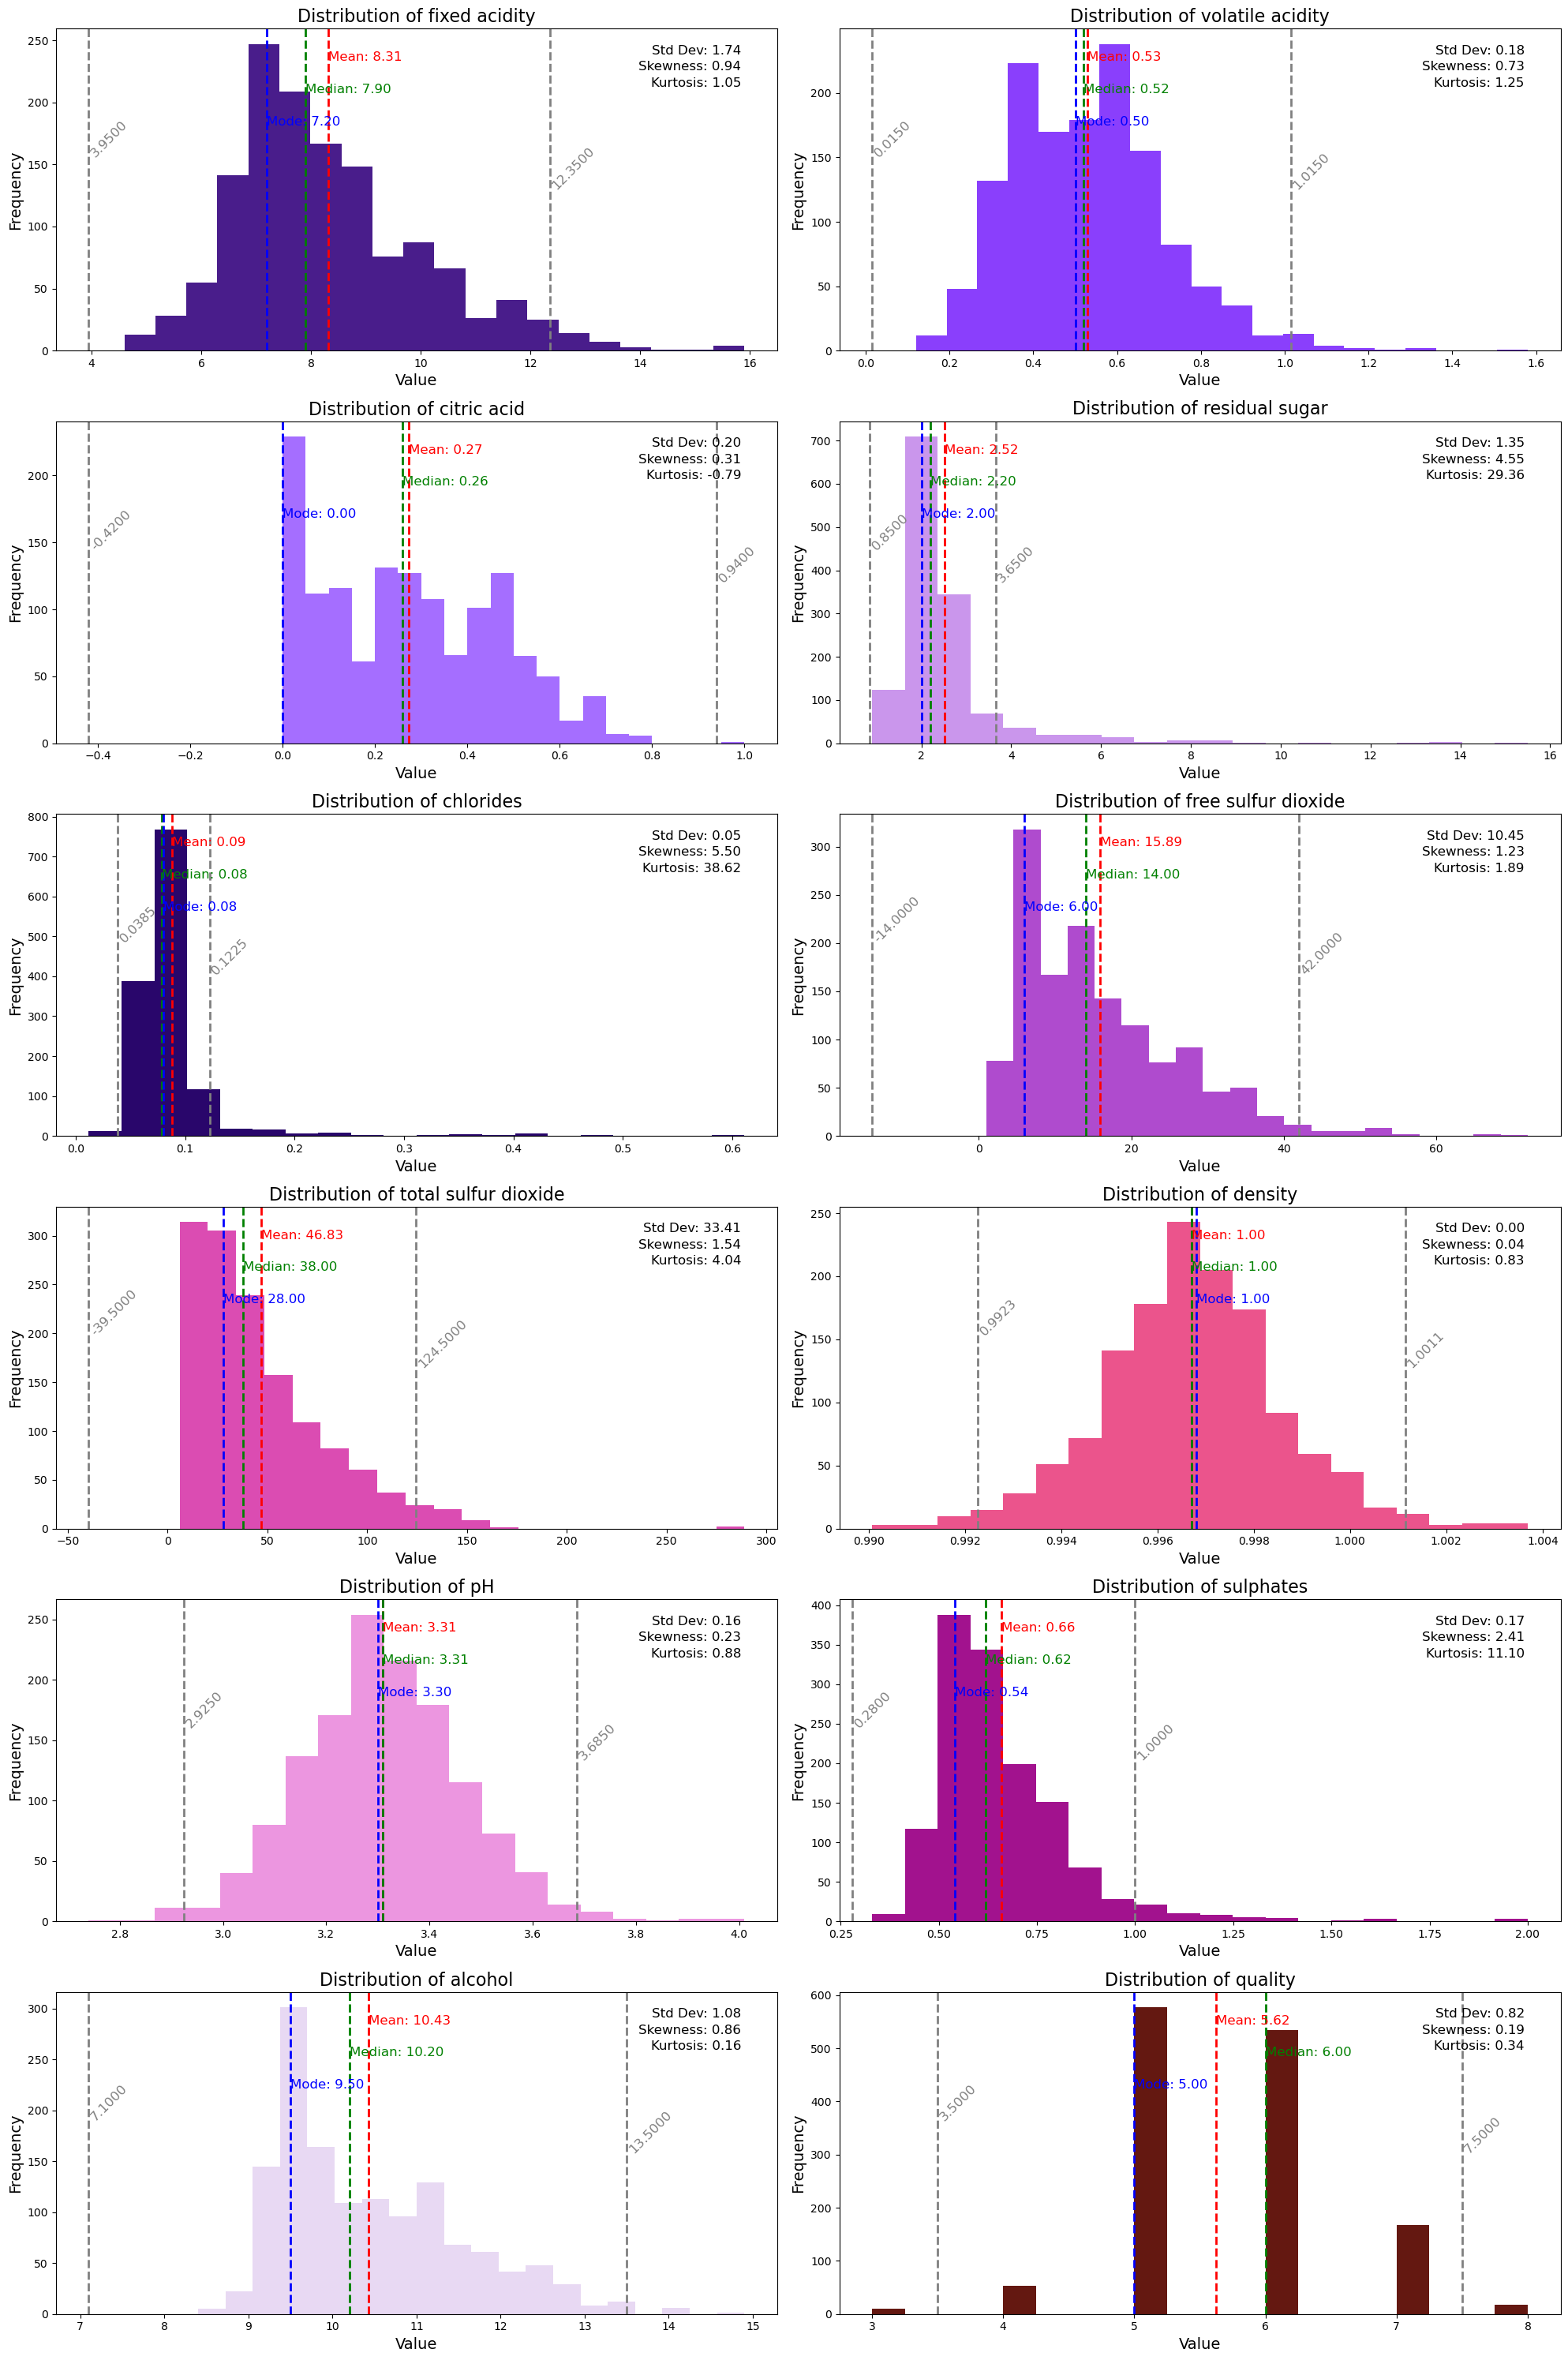

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 그리드 생성
num_cols = len(df1.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 30))

# 사용할 색상 정의
colors = ['#491D8B', '#8A3FFC', '#A56EFF', '#CA96EC', '#29066B', '#AF4BCE', 
          '#DB4CB2', '#EB548C', '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

# 각 열에 대해 히스토그램 생성
for i, (column, color) in enumerate(zip(df1.columns, colors)):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    
    # 히스토그램 그리기
    ax.hist(df1[column], bins=20, color=color)  # 히스토그램 색깔 변경
    ax.set_title(f'Distribution of {column}', fontsize=16)
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # 통계치 계산
    mean_val = df1[column].mean()
    median_val = df1[column].median()
    mode_val = df1[column].mode()[0]  # 최빈값은 mode()의 결과 중 첫 번째 값 사용
    std_dev_val = df1[column].std()
    skewness_val = df1[column].skew()
    kurtosis_val = df1[column].kurtosis()

    # IQR 계산
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # 이상치의 상한선과 하한선 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 상한선과 하한선을 점선으로 그리기
    ax.axvline(lower_bound, color='gray', linestyle='dashed', linewidth=2, label='Lower Bound')
    ax.axvline(upper_bound, color='gray', linestyle='dashed', linewidth=2, label='Upper Bound')

    # 통계치를 히스토그램 위에 선으로 표시
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(mode_val, color='blue', linestyle='dashed', linewidth=2, label='Mode')  # 색깔 변경

    # 통계치 이름 표시
    ax.text(mean_val, ax.get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='red', fontsize=12)
    ax.text(median_val, ax.get_ylim()[1]*0.8, f'Median: {median_val:.2f}', color='green', fontsize=12)
    ax.text(mode_val, ax.get_ylim()[1]*0.7, f'Mode: {mode_val:.2f}', color='blue', fontsize=12)  # 색깔 변경

    # 상한선과 하한선 값 표시 (소수점 4자리까지)
    ax.text(lower_bound, ax.get_ylim()[1]*0.6, f'{lower_bound:.4f}', color='gray', fontsize=12, rotation=45)
    ax.text(upper_bound, ax.get_ylim()[1]*0.5, f'{upper_bound:.4f}', color='gray', fontsize=12, rotation=45)

    # 표준편차, 첨도, 왜도를 히스토그램 오른쪽 상단에 텍스트로 표시
    ax.text(0.95, 0.95, f'Std Dev: {std_dev_val:.2f}', transform=ax.transAxes, ha='right', va='top', fontsize=12)
    ax.text(0.95, 0.90, f'Skewness: {skewness_val:.2f}', transform=ax.transAxes, ha='right', va='top', fontsize=12)
    ax.text(0.95, 0.85, f'Kurtosis: {kurtosis_val:.2f}', transform=ax.transAxes, ha='right', va='top', fontsize=12)

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()


<결과 해석>

(1) Fixed Acidity:
표준편차가 1.74로 중간 정도로 흩어져 있음. 첨도가 1.13로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 0.98로 오른쪽꼬리분포.

(2) Volatile Acidity:
표준편차가 0.18로 낮은 편. 첨도가 1.23로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 0.67로 오른쪽꼬리분포.

(3) Citric Acid:
표준편차가 0.19로 낮은 편. 첨도가 -0.79로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.32로 오른쪽꼬리분포.

(4) Residual Sugar:
표준편차가 1.41로 중간 정도로 흩어져 있음. 첨도가 28.62로 매우 뾰족한 꼬리를 가진 매우 비대칭 분포. 왜도가 4.54로 오른쪽꼬리분포.

(5) Chlorides:
표준편차가 0.05로 낮은 편. 첨도가 41.72로 매우 뾰족한 꼬리를 가진 매우 비대칭 분포. 왜도가 5.68로 오른쪽꼬리분표.

(6) Free Sulfur Dioxide:
표준편차가 10.46으로 중간 정도로 흩어져 있음. 첨도가 2.02로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 1.25로 오른쪽꼬리분포.

(7) Total Sulfur Dioxide:
표준편차가 32.90으로 큰 편. 첨도가 3.81로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 1.52로 오른쪽꼬리분포.

(8) Density:
표준편차가 0.00로 매우 낮은 편 (거의 변하지 않음). 첨도가 0.93로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.07로 오른쪽꼬리분포.

(9) pH:
표준편차가 0.15로 낮은 편. 첨도가 0.81로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.19로 오른쪽꼬리분포.

(10) Sulphates:
표준편차가 0.17로 낮은 편. 첨도가 2.43로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 11.72로 오른쪽꼬리분포.

(11) Alcohol:
표준편차가 1.07로 중간 정도로 흩어져 있음. 첨도가 0.20로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.86로 오른쪽꼬리분포.

(12) Quality:
표준편차가 0.81로 중간 정도로 흩어져 있음. 첨도가 0.30로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.22로 오른쪽꼬리분포.

위의 히스토그램에 나타난 값들을 요약하자면 아래와 같은 표로 나타낼 수 있다

(각 변수들의 평균값/중앙값/최빈값/표준편차/첨도/왜도)

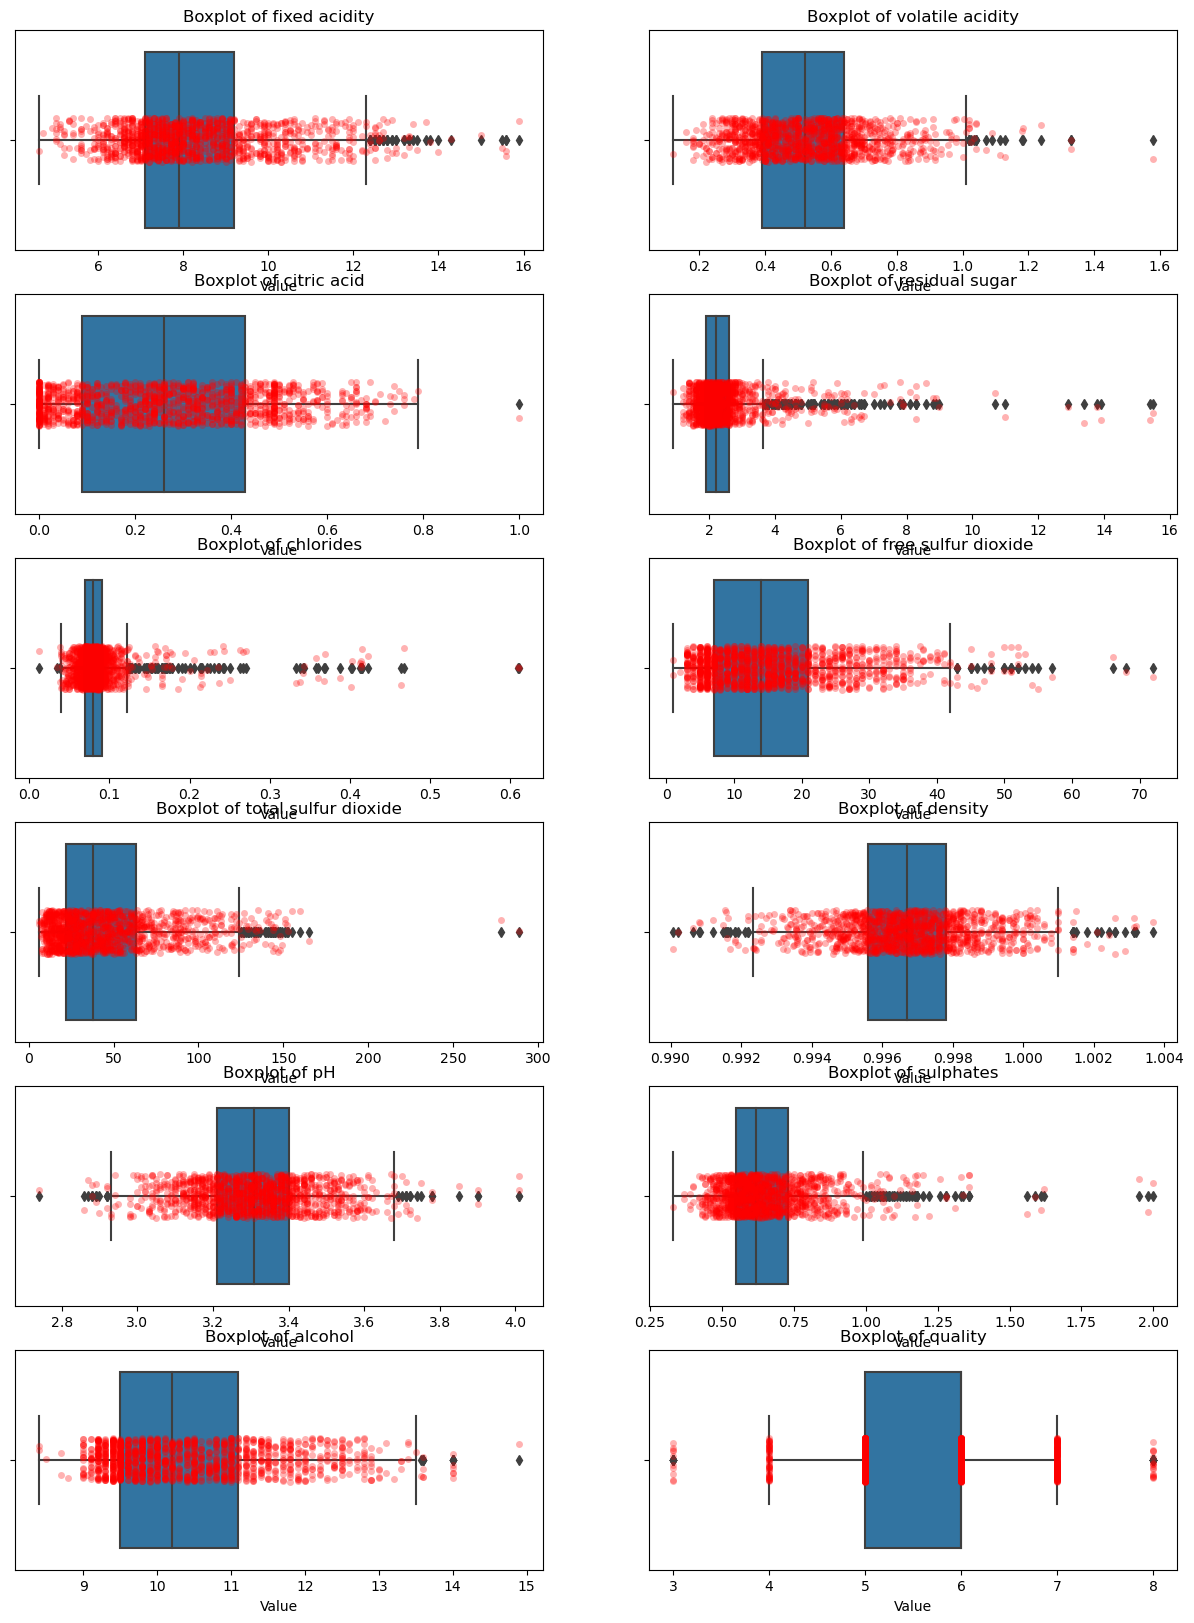

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df1.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 boxplot을 서브플롯에 그리기
for i, column in enumerate(df.columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(x=df1[column], ax=axes[row_index, col_index], whis=1.5)  # whis 조절
    sns.stripplot(x=df1[column], ax=axes[row_index, col_index], color='red', marker='o', alpha=0.3)  # 이상치 마커 설정
    axes[row_index, col_index].set_title(f'Boxplot of {column}')
    axes[row_index, col_index].set_xlabel('Value')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])


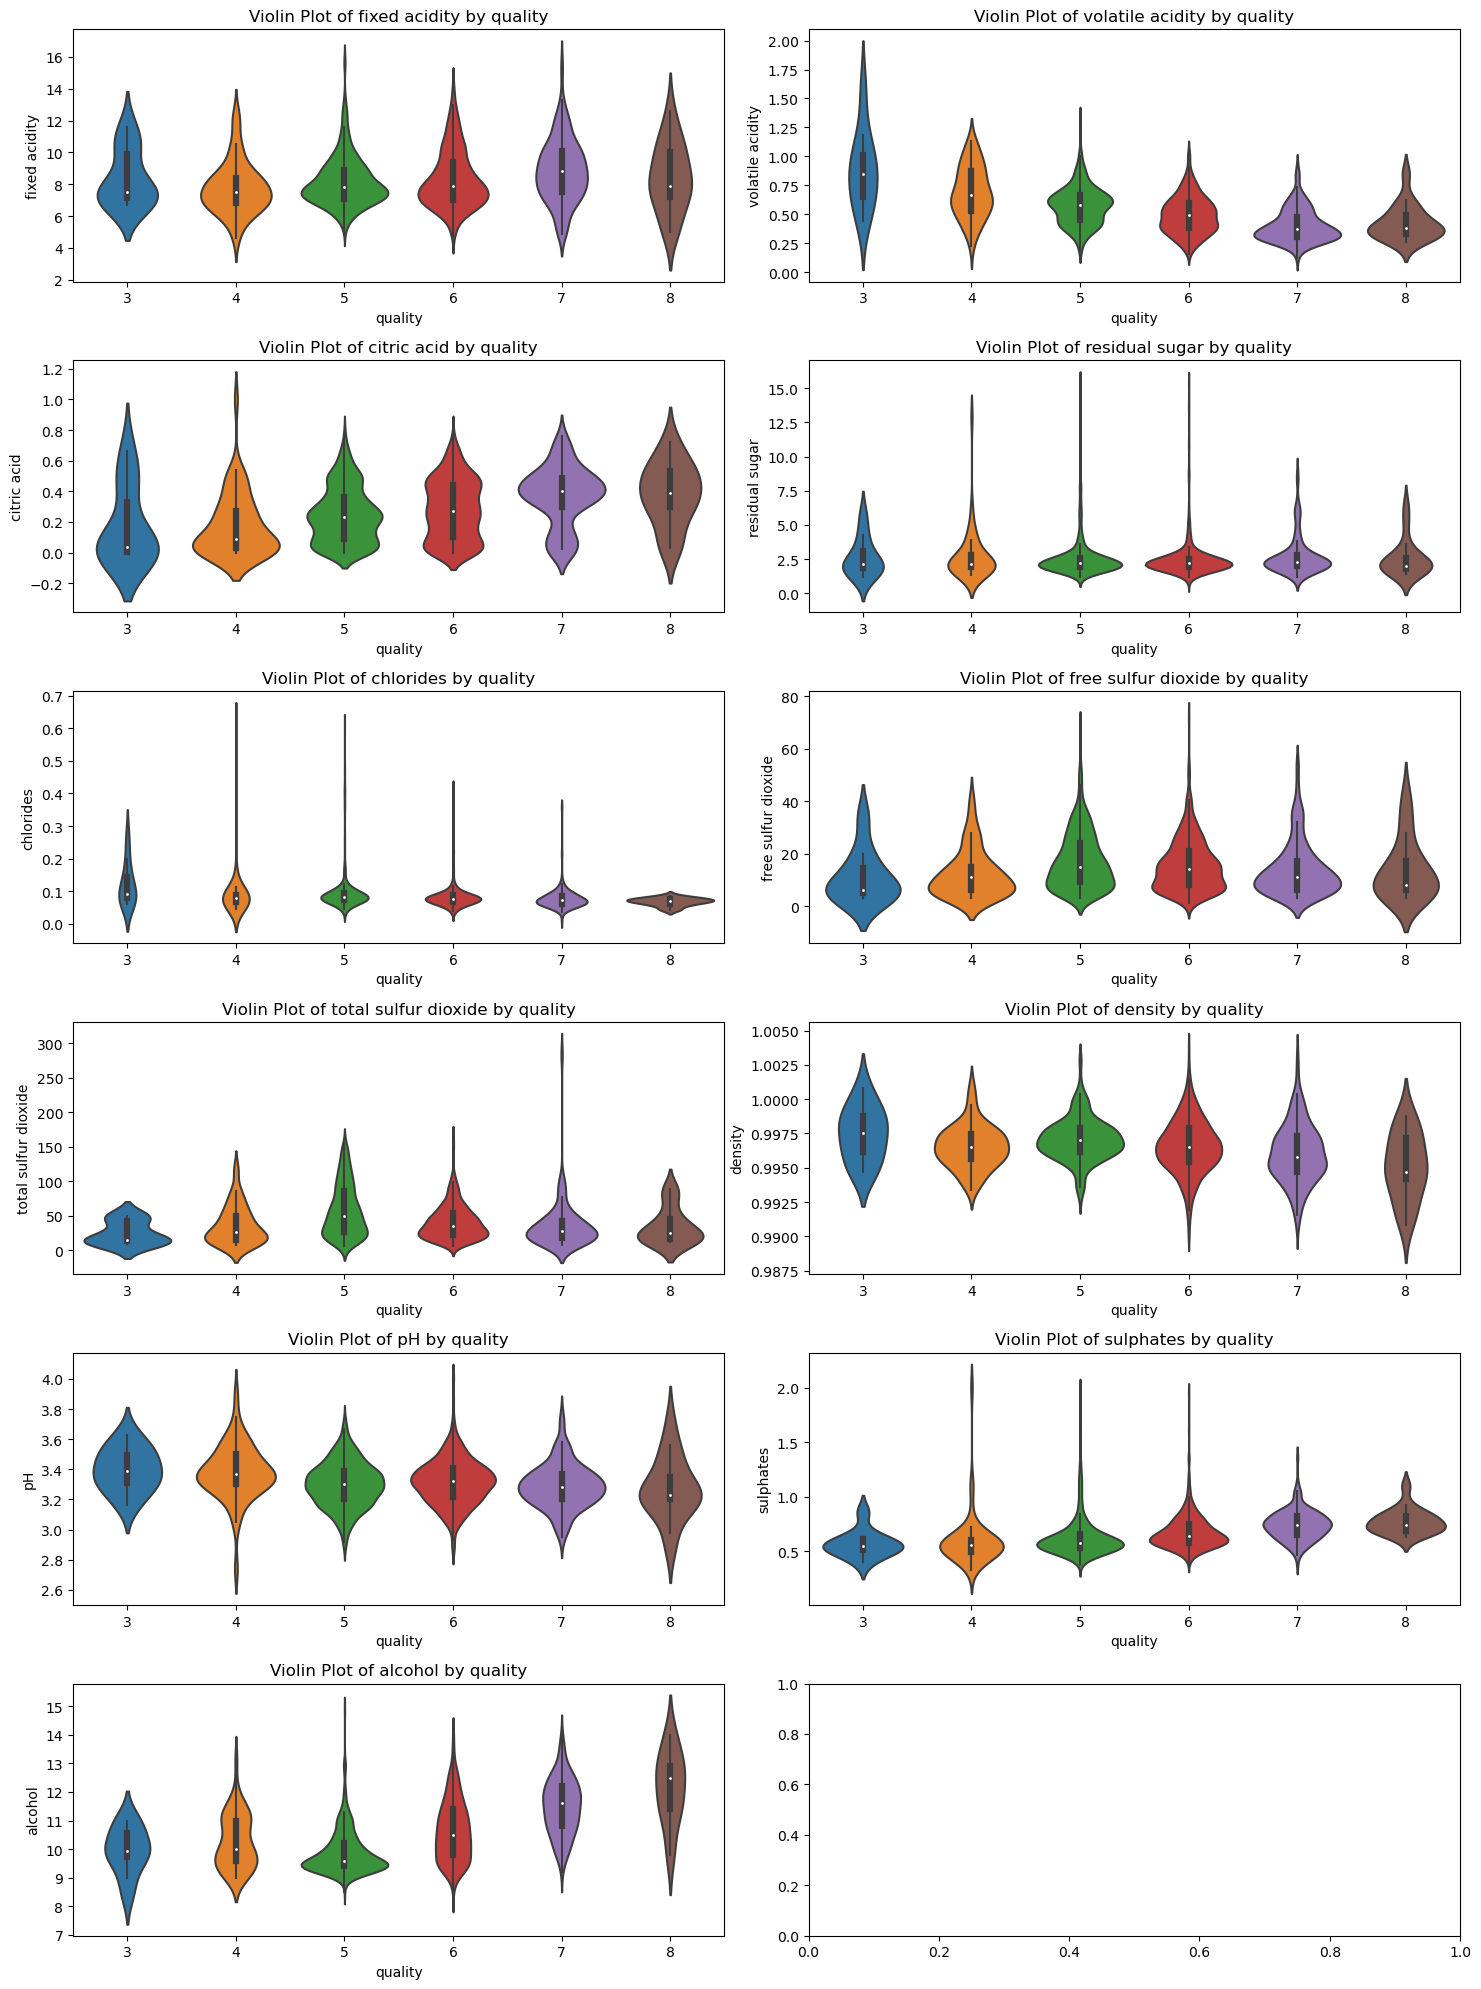

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df1.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 violin plot을 서브플롯에 그리기
for i, column in enumerate(df1.columns[:-1]):  # 마지막 열은 종속 변수이므로 제외
    row_index = i // 2
    col_index = i % 2
    sns.violinplot(x=df1[df1.columns[-1]], y=df1[column], ax=axes[row_index, col_index])  # violin plot 그리기
    axes[row_index, col_index].set_title(f'Violin Plot of {column} by {df1.columns[-1]}')
    axes[row_index, col_index].set_xlabel(df1.columns[-1])
    axes[row_index, col_index].set_ylabel(column)

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()


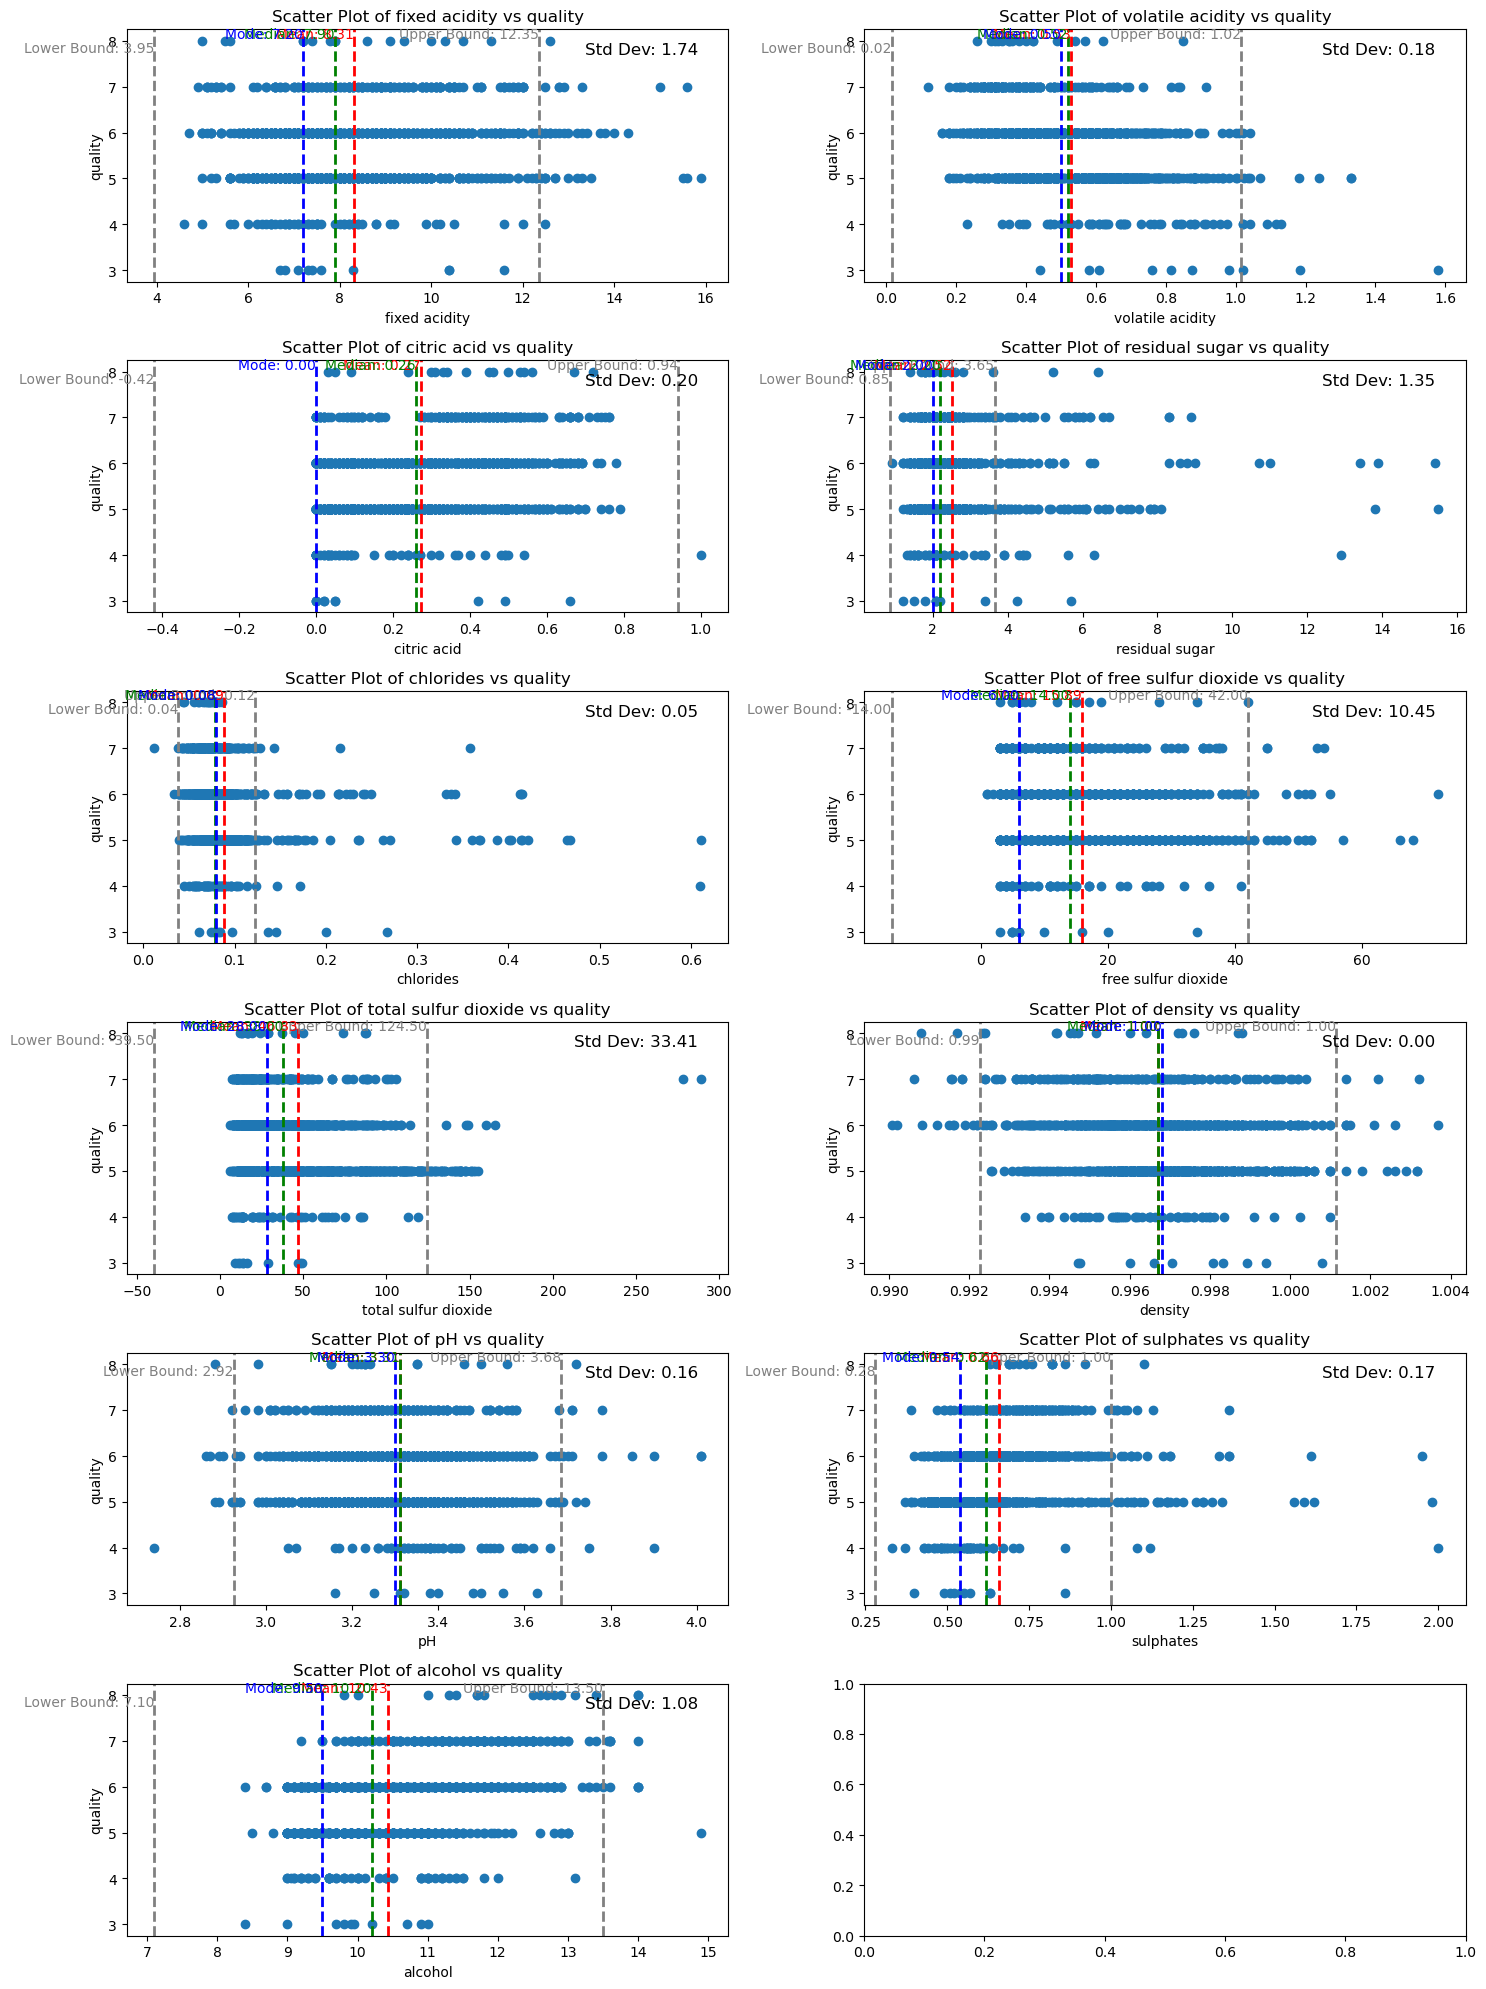

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 그리드 생성
num_cols = len(df1.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for i, column in enumerate(df1.columns[:-1]):  # 마지막 열은 종속 변수이므로 제외
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    
    # 산점도 그리기
    ax.scatter(df1[column], df1[df1.columns[-1]])
    ax.set_title(f'Scatter Plot of {column} vs {df1.columns[-1]}')
    ax.set_xlabel(column)
    ax.set_ylabel(df1.columns[-1])

    # 통계치 계산
    mean_val = df1[column].mean()
    median_val = df1[column].median()
    mode_val = df1[column].mode()[0]
    std_dev_val = df1[column].std()

    # IQR 계산
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1

    # 상한선과 하한선 계산
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # 상한선과 하한선을 점선으로 그리기
    ax.axvline(upper_bound, color='gray', linestyle='dashed', linewidth=2, label='Upper Bound')
    ax.axvline(lower_bound, color='gray', linestyle='dashed', linewidth=2, label='Lower Bound')

    # 통계치를 히스토그램 위에 선으로 표시
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(mode_val, color='blue', linestyle='dashed', linewidth=2, label='Mode')

    # 표준편차 값을 히스토그램 오른쪽 상단에 텍스트로 표시
    ax.text(0.95, 0.95, f'Std Dev: {std_dev_val:.2f}', transform=ax.transAxes, ha='right', va='top', fontsize=12)

    # 상한선과 하한선 값 표시
    ax.text(upper_bound, df1[df1.columns[-1]].max(), f'Upper Bound: {upper_bound:.2f}', color='gray', fontsize=10, ha='right', va='bottom', rotation=0)
    ax.text(lower_bound, df1[df1.columns[-1]].max(), f'Lower Bound: {lower_bound:.2f}', color='gray', fontsize=10, ha='right', va='top', rotation=0)

    # 통계치 이름 표시
    ax.text(mean_val, df1[df1.columns[-1]].max(), f'Mean: {mean_val:.2f}', color='red', fontsize=10, ha='right', va='bottom', rotation=0)
    ax.text(median_val, df1[df1.columns[-1]].max(), f'Median: {median_val:.2f}', color='green', fontsize=10, ha='right', va='bottom', rotation=0)
    ax.text(mode_val, df1[df1.columns[-1]].max(), f'Mode: {mode_val:.2f}', color='blue', fontsize=10, ha='right', va='bottom', rotation=0)

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()
